## Import necessary packages

In [1]:
import pickle
import gzip
import matplotlib.pyplot
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
from PIL import Image
import os
import numpy as np
import numpy as np
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import fetch_mldata
from tqdm import tqdm
from sklearn.metrics import accuracy_score
from sklearn import metrics
import keras
from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential
from tqdm import tqdm
import scipy.sparse
from __future__ import print_function
import sys
import time
from etaprogress.progress import ProgressBar

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Load MNIST on Python 3.x

In [2]:
filename = 'mnist.pkl.gz'
f = gzip.open(filename, 'rb')
training_data, validation_data, test_data = pickle.load(f, encoding='latin1') 
f.close()

In [3]:
df_mnist_train=pd.DataFrame(data=training_data[1],columns=["label"])

In [4]:
df_mnist_train['feature_vector'] = 'NaN'
for i in range(0,len(training_data[0])):
    df_mnist_train.at[i,'feature_vector']=training_data[0][i]

In [5]:
df_mnist_valid=pd.DataFrame(data=validation_data[1],columns=["label"])

In [6]:
df_mnist_valid['feature_vector'] = 'NaN'
for i in range(0,len(validation_data[0])):
    df_mnist_valid.at[i,'feature_vector']=validation_data[0][i]

In [7]:
df_mnist_test=pd.DataFrame(data=test_data[1],columns=["label"])

In [8]:
df_mnist_test['feature_vector'] = 'NaN'
for i in range(0,len(test_data[0])):
    df_mnist_test.at[i,'feature_vector']=test_data[0][i]

## Load USPS on Python 3.x

In [3]:
USPSMat  = []
USPSTar  = []
curPath  = '/Users/yashahuja/Desktop/College/Sem 3/Intro to Machine Learning- CSE574/Homework/Project 3/USPSdata/Numerals'
savedImg = []

for j in range(0,10):
    curFolderPath = curPath + '/' + str(j)
    imgs =  os.listdir(curFolderPath)
    for img in imgs:
        curImg = curFolderPath + '/' + img
        if curImg[-3:] == 'png':
            img = Image.open(curImg,'r')
            img = img.resize((28, 28))
            savedImg = img
            imgdata = (255-np.array(img.getdata()))/255
            USPSMat.append(imgdata)
            USPSTar.append(j)

In [4]:
df_usps=pd.DataFrame(data=USPSTar,columns=["label"])

In [5]:
df_usps['feature_vector'] = 'NaN'
for i in range(0,len(USPSMat)):
    df_usps.at[i,'feature_vector']=USPSMat[i]

## Splitting datasets

In [7]:
#MNIST
X_train, y_train = training_data
X_test, y_test = test_data
X_valid, y_valid = validation_data

#USPS
X_test1, y_test1 = np.array(USPSMat), np.array(USPSTar)

## SVM

### Tuning gamma value on MNIST validation

In [8]:
gamma_tune = [0.001, 0.002, 0.003, 0.004, 0.005]
Accuracy_gamma = []
for i in tqdm(range(len(gamma_tune))):
    classifier1 = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, 
                  decision_function_shape='ovr', degree=3, gamma=gamma_tune[i], 
                  kernel='rbf', max_iter=-1, probability=False, random_state=None, 
                  shrinking=True, tol=0.001, verbose=True)
    classifier1.fit(X_train, y_train)
    
    expected = y_valid
    predicted = classifier1.predict(X_valid)

    #print("Classification report for classifier %s:\n%s\n"
         # % (classifier2, metrics.classification_report(expected_r, predicted_r)))
       
    cm_svm_m = metrics.confusion_matrix(expected, predicted)
    #print("Confusion matrix:\n%s" % cm_svm_m)
    
    #print("Accuracy={}".format(metrics.accuracy_score(expected_r, predicted_r)))
    Accuracy1 = metrics.accuracy_score(expected, predicted)
    Accuracy_gamma.append(Accuracy1)

  0%|          | 0/5 [00:00<?, ?it/s]

[LibSVM]

 20%|██        | 1/5 [12:53<51:34, 773.75s/it]

[LibSVM]

 40%|████      | 2/5 [23:36<36:43, 734.38s/it]

[LibSVM]

 60%|██████    | 3/5 [32:41<22:35, 677.73s/it]

[LibSVM]

 80%|████████  | 4/5 [41:08<10:26, 626.52s/it]

[LibSVM]

100%|██████████| 5/5 [51:31<00:00, 625.29s/it]


In [93]:
print("Confusion matrix:\n%s" % cm_svm_m)

Confusion matrix:
[[ 978    0    4    0    1    0    3    1    3    1]
 [   0 1055    4    2    1    0    0    0    1    1]
 [   1    1  957    3    6    4    4    4    7    3]
 [   0    2    9  984    1   13    0    3   15    3]
 [   0    6    2    0  954    0    2    2    2   15]
 [   3    0    6   16    3  868   13    1    3    2]
 [   3    0    2    0    1    3  955    0    3    0]
 [   1    6    8    2    3    0    0 1062    0    8]
 [   2    9    5   10    0   10    3    5  958    7]
 [   3    3    2   10   12    3    0   13    4  911]]


### Tuning kernel type on MNIST validation

In [4]:
kernel_tune = ['linear', 'poly', 'rbf']
Accuracy_kernel = []
bar = ProgressBar(len(kernel_tune), max_width=40)
for i in tqdm(range(len(kernel_tune))):
    bar.numerator = i
    print(bar, end='\r')
    sys.stdout.flush()
    time.sleep(1)
    classifier1 = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, 
                  decision_function_shape='ovr', degree=3, gamma=0.001, 
                  kernel=kernel_tune[i], max_iter=-1, probability=False, random_state=None, 
                  shrinking=True, tol=0.001, verbose=True)
    classifier1.fit(X_train, y_train)
    
    expected = y_valid
    predicted = classifier1.predict(X_valid)

    #print("Classification report for classifier %s:\n%s\n"
         # % (classifier2, metrics.classification_report(expected_r, predicted_r)))
      
    cm_svm_mk = metrics.confusion_matrix(expected, predicted)
    #print("Confusion matrix:\n%s" % cm_svm_mk)
    
    #print("Accuracy={}".format(metrics.accuracy_score(expected_r, predicted_r)))
    Accuracy1 = metrics.accuracy_score(expected, predicted)
    Accuracy_kernel.append(Accuracy1)

  0%|          | 0/3 [00:00<?, ?it/s]

[LibSVM]3) [               ] eta --:-- /

 33%|███▎      | 1/3 [07:45<15:31, 465.93s/it]

[LibSVM]3) [#####          ] eta 15:32 -

 67%|██████▋   | 2/3 [1:53:24<37:07, 2227.84s/it]

[LibSVM]3) [########     ] eta 1:10:03 \

100%|██████████| 3/3 [2:09:43<00:00, 1853.04s/it]


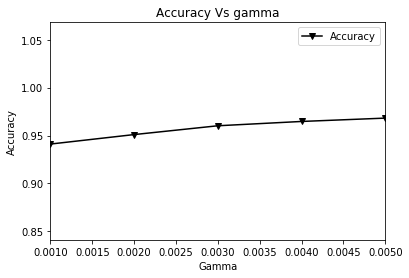

In [9]:
plt.title('Accuracy Vs gamma')
plt.plot(gamma_tune,Accuracy_gamma,'kv-', label='Accuracy')
plt.axis([min(gamma_tune), max(gamma_tune), min(Accuracy_gamma)-0.1, max(Accuracy_gamma)+0.1])
plt.ylabel('Accuracy')
plt.xlabel("Gamma")
l = plt.legend()

In [10]:
Accuracy_gamma

[0.9411, 0.951, 0.9602, 0.9647, 0.9682]

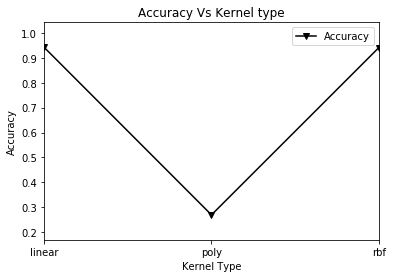

In [5]:
plt.title('Accuracy Vs Kernel type')
plt.plot(kernel_tune,Accuracy_kernel,'kv-', label='Accuracy')
plt.axis([min(kernel_tune), max(kernel_tune), min(Accuracy_kernel)-0.1, max(Accuracy_kernel)+0.1])
plt.ylabel('Accuracy')
plt.xlabel("Kernel Type")
l = plt.legend()

In [6]:
Accuracy_kernel

[0.9423, 0.2696, 0.9411]

### Testing on MNIST test set

In [11]:
# Model
classifier1 = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, 
                  decision_function_shape='ovr', degree=3, gamma=0.005, 
                  kernel='rbf', max_iter=-1, probability=False, random_state=None, 
                  shrinking=True, tol=0.001, verbose=True)
classifier1.fit(X_train, y_train)

#Testing
expected = y_test
predicted = classifier1.predict(X_test)

print("Classification report for classifier %s:\n%s\n"
      % (classifier1, metrics.classification_report(expected, predicted)))
      
cm_svm_test = metrics.confusion_matrix(expected, predicted)
print("Confusion matrix:\n%s" % cm_svm_test)

print("Accuracy={}".format(metrics.accuracy_score(expected, predicted)))

[LibSVM]Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.005, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=True):
             precision    recall  f1-score   support

          0       0.97      0.99      0.98       980
          1       0.98      0.99      0.99      1135
          2       0.96      0.96      0.96      1032
          3       0.95      0.96      0.96      1010
          4       0.96      0.97      0.97       982
          5       0.97      0.95      0.96       892
          6       0.97      0.98      0.98       958
          7       0.96      0.95      0.96      1028
          8       0.96      0.95      0.96       974
          9       0.96      0.94      0.95      1009

avg / total       0.97      0.97      0.97     10000


Confusion matrix:
[[ 970    0    1    0    0    3    2    1    3    0]
 [   0 1125    3    

In [39]:
y_list_svm_m = list(predicted)

### Testing on USPS test set

In [12]:
expected1 = y_test1
predicted1 = classifier1.predict(X_test1)

print("Classification report for classifier %s:\n%s\n"
      % (classifier1, metrics.classification_report(expected1, predicted1)))
      
cm_svm_u = metrics.confusion_matrix(expected1, predicted1)
print("Confusion matrix:\n%s" % cm_svm_u)

print("Accuracy_USPS={}".format(metrics.accuracy_score(expected1, predicted1)))

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.005, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=True):
             precision    recall  f1-score   support

          0       0.49      0.30      0.37      2000
          1       0.58      0.19      0.29      2000
          2       0.33      0.77      0.46      1999
          3       0.51      0.63      0.56      2000
          4       0.60      0.53      0.57      2000
          5       0.30      0.70      0.42      2000
          6       0.74      0.39      0.51      2000
          7       0.23      0.25      0.24      2000
          8       0.40      0.11      0.17      2000
          9       0.30      0.10      0.16      2000

avg / total       0.45      0.40      0.38     19999


Confusion matrix:
[[ 603    1  449   23  198  279   55   53    5  334]
 [  88  389  333  164  179  

In [90]:
y_list_svm_u = list(predicted1)

## RANDOM FOREST

### Tuning number of estimators on MNIST validation

In [13]:
number_estimators_rf_m = list(range(10,50,5))
Accuracy_rf_m = []
for i in range(len(number_estimators_rf_m)):
    classifier2 = RandomForestClassifier(n_jobs=-1, n_estimators = number_estimators_rf_m[i])
    classifier2.fit(X_train, y_train)
    classifier2.score(X_valid, y_valid)

    expected_r = y_valid
    predicted_r = classifier2.predict(X_valid)

    #print("Classification report for classifier %s:\n%s\n"
         # % (classifier2, metrics.classification_report(expected_r, predicted_r)))
      
    cm_rf_m = metrics.confusion_matrix(expected_r, predicted_r)
    #print("Confusion matrix:\n%s" % cm)
    
    #print("Accuracy={}".format(metrics.accuracy_score(expected_r, predicted_r)))
    Accuracy1 = metrics.accuracy_score(expected_r, predicted_r)
    Accuracy_rf_m.append(Accuracy1)

In [76]:
print("Accuracy={}".format(max(Accuracy_rf_m)))

Accuracy=0.97


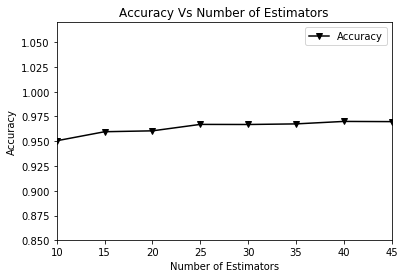

In [74]:
plt.title('Accuracy Vs Number of Estimators')
plt.plot(number_estimators_rf_m,Accuracy_rf_m,'kv-', label='Accuracy')
plt.axis([min(number_estimators_rf_m), max(number_estimators_rf_m), min(Accuracy_rf_m)-0.1, max(Accuracy_rf_m)+0.1])
plt.xticks(number_estimators_rf_m)
plt.ylabel('Accuracy')
plt.xlabel("Number of Estimators")
l = plt.legend()

In [75]:
Accuracy_rf_m

[0.9505, 0.9596, 0.9605, 0.967, 0.9669, 0.9675, 0.97, 0.9698]

### Testing on MNIST test set

In [16]:
classifier2 = RandomForestClassifier(n_jobs=-1, n_estimators = 50)
classifier2.fit(X_train, y_train)
classifier2.score(X_test, y_test)

expected_r = y_test
predicted_r = classifier2.predict(X_test)

print("Classification report for classifier %s:\n%s\n"
     % (classifier2, metrics.classification_report(expected_r, predicted_r)))
      
cm_rf_m = metrics.confusion_matrix(expected_r, predicted_r)
print("Confusion matrix:\n%s" % cm_rf_m)
    
print("Accuracy={}".format(metrics.accuracy_score(expected_r, predicted_r)))

Classification report for classifier RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False):
             precision    recall  f1-score   support

          0       0.97      0.99      0.98       980
          1       0.99      0.99      0.99      1135
          2       0.95      0.96      0.96      1032
          3       0.96      0.96      0.96      1010
          4       0.97      0.97      0.97       982
          5       0.97      0.96      0.97       892
          6       0.97      0.97      0.97       958
          7       0.97      0.96      0.96      1028
          8       0.96      0.95      0.95       974
         

In [42]:
y_list_rf_m = list(predicted_r)

### Testing on USPS test set

In [17]:
classifier2 = RandomForestClassifier(n_jobs=-1, n_estimators=10)
classifier2.fit(X_train, y_train)
classifier2.score(X_test1, y_test1)

expected1_r = y_test1
predicted1_r = classifier2.predict(X_test1)

print("Classification report for classifier %s:\n%s\n"
    % (classifier2, metrics.classification_report(expected1_r, predicted1_r)))
cm_rf_u = metrics.confusion_matrix(expected1_r, predicted1_r)
print("Confusion matrix:\n%s" % cm_rf_u)

print("Accuracy_USPS={}".format(metrics.accuracy_score(expected1_r, predicted1_r)))

Classification report for classifier RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False):
             precision    recall  f1-score   support

          0       0.31      0.34      0.33      2000
          1       0.27      0.25      0.26      2000
          2       0.28      0.39      0.32      1999
          3       0.38      0.47      0.42      2000
          4       0.37      0.48      0.42      2000
          5       0.31      0.51      0.38      2000
          6       0.53      0.23      0.32      2000
          7       0.18      0.27      0.22      2000
          8       0.32      0.06      0.10      2000
         

In [91]:
y_list_rf_u = list(predicted1_r)

# NEURAL NETWORKS

### Tuning activation function and optimizer on MNIST validation 

In [18]:
num_classes=10
image_vector_size=28*28
x_train_n = X_train.reshape(X_train.shape[0], image_vector_size)
x_valid_n = X_valid.reshape(X_valid.shape[0], image_vector_size)
y_train_n = keras.utils.to_categorical(y_train, num_classes)
y_valid_n = keras.utils.to_categorical(y_valid, num_classes)

In [19]:
optimizer_m = ['sgd', 'rmsprop', 'adagrad', 'adadelta', 'adamax', 'adam']
activation_m = ['relu', 'sigmoid', 'tanh', 'selu', 'softmax', 'softsign', 'elu', 'softplus']
Accuracy_act = []
Accuracy_opt = []

for i in range(len(activation_m)):
    image_size = 784 
    model = Sequential()
    model.add(Dense(units=256, activation=activation_m[i], input_shape=(image_size,)))
    model.add(Dense(units=256, activation='relu', input_shape=(image_size,)))
    model.add(Dense(units=256, activation='relu', input_shape=(image_size,)))
    model.add(Dense(units=num_classes, activation='softmax'))
    model.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['accuracy'])
    history = model.fit(x_train_n, y_train_n, batch_size=128, epochs=20, verbose=False,validation_split=.1)
    Loss, Accuracy_act1 = model.evaluate(x_valid_n, y_valid_n, verbose=False)
    Accuracy_act.append(Accuracy_act1)
for j in range(len(optimizer_m)):
    image_size = 784 
    model = Sequential()
    model.add(Dense(units=256, activation='relu', input_shape=(image_size,)))
    model.add(Dense(units=256, activation='relu', input_shape=(image_size,)))
    model.add(Dense(units=256, activation='relu', input_shape=(image_size,)))
    model.add(Dense(units=num_classes, activation='softmax'))
    model.compile(optimizer=optimizer_m[j], loss='categorical_crossentropy',metrics=['accuracy'])
    history = model.fit(x_train_n, y_train_n, batch_size=128, epochs=20, verbose=False,validation_split=.1)
    Loss, Accuracy_opt1 = model.evaluate(x_valid_n, y_valid_n, verbose=False)
    Accuracy_opt.append(Accuracy_opt1)

In [20]:
Accuracy_act

[0.9575, 0.9179, 0.9555, 0.9594, 0.1064, 0.9521, 0.9575, 0.9362]

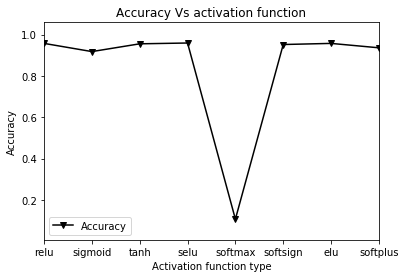

In [21]:
plt.title('Accuracy Vs activation function')
plt.plot(activation_m ,Accuracy_act,'kv-', label='Accuracy')
plt.axis([max(activation_m), min(activation_m), min(Accuracy_act)-0.1, max(Accuracy_act)+0.1])
plt.xticks(activation_m)
plt.ylabel('Accuracy')
plt.xlabel("Activation function type")
l = plt.legend()

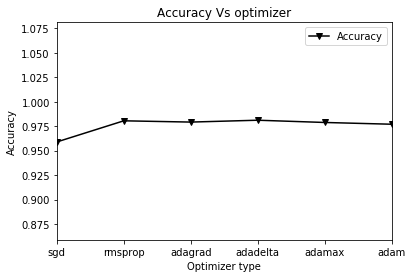

In [22]:
plt.title('Accuracy Vs optimizer')
plt.plot(optimizer_m,Accuracy_opt,'kv-', label='Accuracy')
plt.axis([max(optimizer_m), min(optimizer_m), min(Accuracy_opt)-0.1, max(Accuracy_opt)+0.1])
plt.xticks(optimizer_m)
plt.ylabel('Accuracy')
plt.xlabel("Optimizer type")
l = plt.legend()

In [23]:
Accuracy_opt

[0.9589, 0.9805, 0.9792, 0.9811, 0.9788, 0.977]

### Testing on MNIST test set

In [24]:
#Preprocessing
num_classes=10
image_vector_size=28*28
x_train_n = X_train.reshape(X_train.shape[0], image_vector_size)
x_test_n = X_test.reshape(X_test.shape[0], image_vector_size)
y_train_n = keras.utils.to_categorical(y_train, num_classes)
y_test_n = keras.utils.to_categorical(y_test, num_classes)

In [77]:
#Model
image_size = 784 
model1 = Sequential()
model1.add(Dense(units=256, activation='relu', input_shape=(image_size,)))
model1.add(Dense(units=256, activation='relu', input_shape=(image_size,)))
model1.add(Dense(units=256, activation='relu', input_shape=(image_size,)))
model1.add(Dense(units=num_classes, activation='softmax'))
model1.compile(optimizer='adadelta', loss='categorical_crossentropy',metrics=['accuracy'])
history = model1.fit(x_train_n, y_train_n, batch_size=128, epochs=20, verbose=False,validation_split=.1)

In [78]:
# Condfusion Matrix
y_pred = model1.predict(x_test_n)
y_pred_class = np.argmax(y_pred, axis = 1) 
y_true = np.argmax(y_test_n, axis = 1) 
matrix = metrics.confusion_matrix(y_true, y_pred_class)
matrix

array([[ 970,    1,    2,    0,    1,    1,    2,    1,    2,    0],
       [   0, 1126,    2,    1,    0,    1,    1,    0,    4,    0],
       [   1,    0, 1018,    2,    3,    0,    1,    3,    3,    1],
       [   2,    1,    3,  991,    0,    5,    0,    2,    4,    2],
       [   0,    0,    4,    0,  962,    0,    2,    4,    1,    9],
       [   2,    0,    0,    5,    1,  874,    6,    0,    2,    2],
       [   3,    2,    1,    1,    4,    3,  943,    0,    1,    0],
       [   1,    2,    7,    1,    1,    0,    0, 1011,    3,    2],
       [   2,    0,    3,    4,    4,    1,    3,    3,  949,    5],
       [   3,    2,    0,    2,   10,    3,    0,    5,    3,  981]])

In [79]:
loss,accuracy = model.evaluate(x_test_n, y_test_n, verbose=False)

In [80]:
accuracy

0.9769

In [43]:
y_list = list(y_pred_class)

### Testin on USPS test set

In [81]:
num_classes=10
image_vector_size=28*28
x_train_n = X_train.reshape(X_train.shape[0], image_vector_size)
x_test_n1 = X_test1.reshape(X_test1.shape[0], image_vector_size)
y_train_n = keras.utils.to_categorical(y_train, num_classes)
y_test_n1 = keras.utils.to_categorical(y_test1, num_classes)

In [82]:
# Condfusion Matrix
y_pred1 = model.predict(x_test_n1)
y_pred_class1 = np.argmax(y_pred1, axis = 1) 
y_true1 = np.argmax(y_test_n1, axis = 1) 
matrix1 = metrics.confusion_matrix(y_true1, y_pred_class1)
matrix1

array([[ 474,   12,  148,  118,  290,  214,  189,  129,   93,  333],
       [  12,  439,  449,  106,  412,  127,   25,  296,   80,   54],
       [  13,    7, 1636,  104,   25,   89,   52,   25,   46,    2],
       [   4,   12,  153, 1426,    5,  294,    5,   13,   80,    8],
       [   6,   87,  105,   17, 1198,  102,   31,  254,  144,   56],
       [  24,    9,  111,  176,   20, 1454,   33,   33,  122,   18],
       [  16,   16,  289,   37,   67,  254, 1135,   60,   64,   62],
       [  13,  134,  413,  468,   53,   36,   21,  669,  179,   14],
       [ 108,   17,  257,  375,   99,  266,  114,   80,  643,   41],
       [   4,   84,  114,  271,  244,   45,    6,  550,  355,  327]])

In [83]:
loss1,accuracy1 = model1.evaluate(x_test_n1, y_test_n1, verbose=False)

In [84]:
accuracy1

0.4756737836817335

In [92]:
y_list_u = list(y_pred_class1)

# LOGISTIC REGRESSION

In [49]:
# Defining the necessary functions:
# one hot encoder for this multiclass problem
def one_hot(x, number_classes):
    return np.squeeze(np.eye(number_classes)[x.reshape(-1)])
def softmax(z):
    z -= np.max(z)
    sm = (np.exp(z) / np.sum(np.exp(z)))
    return sm

## Preprocessing MNIST data

In [53]:
# Training data: Process feature matrix with bias
bias =np.ones((len(training_data[1]),1))
xprevious_train=training_data[0]
X_bias=np.hstack((bias,xprevious_train))
X_bias.shape
# Testing data: Process feature matrix with bias
test_bias=np.ones((len(test_data[1]),1))
test_xprevious_train=test_data[0]
testX=np.hstack((test_bias,test_xprevious_train))
testX.shape
# Validation data: Process feature matrix with bias
valid_bias=np.ones((len(validation_data[1]),1))
valid_xprevious_train=validation_data[0]
valid_X=np.hstack((valid_bias,validation_xprevious_train))
valid_X.shape

y = training_data[1]
testY = test_data[1]
valid_Y = validation_data[1]

W_Now = np.zeros([X_bias.shape[1],len(np.unique(y))])
iterations = len(y)
#losses = []
print (W_Now.shape)

(785, 10)


array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ])

In [58]:
#Model : Implement one-hot encoder, compute raw class scores with input and current weights, find h_test
#        which is the predicted value, and finally accuracy
learningRate_val = np.linspace(0.01, 0.1, num=10)
Accuracy = []
learningrate_tune = []
learningRate = 0.01

for k in tqdm(learningRate_val):
    for i in range(0,len(y)):
        y_mat = one_hot(y[i],len(np.unique(y)))
        scores = np.dot(X_bias[i], W_Now) 
        prob = softmax(scores)
    
        for j in range (len(np.unique(y))):
            gradient = (-1) * np.dot((y_mat[j] - prob[j]),X_bias[i]) 
            W_Now[:,j]    -= np.dot(learningRate,gradient)
    z_validation = np.dot(validationX, W_Now)
    h_validation=[]
    for i in tqdm(range(0,len(validationY))):
        h_validation_raw = softmax(z_validation[i])   
        h_validation.append(np.argmax(h_validation_raw))
   
    wrong_val   = 0
    right_val   = 0

    for i in range(0,len(validationY)):
        if (validationY[i]==h_validation[i]):
            right_val = right_val + 1
        else:
            wrong_val = wrong_val + 1

    Accuracy.append((right_val/(right_val+wrong_val)*100))
    learningrate_tune.append((str(np.round(k,2))))


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

 40%|████      | 4007/10000 [00:00<00:00, 40062.01it/s]

 82%|████████▏ | 8181/10000 [00:00<00:00, 40549.65it/s]

 10%|█         | 1/10 [03:00<27:05, 180.66s/it]

  0%|          | 0/10000 [00:00<?, ?it/s]

 40%|████      | 4027/10000 [00:00<00:00, 40264.28it/s]

 72%|███████▏  | 7205/10000 [00:00<00:00, 37277.81it/s]

 93%|█████████▎| 9308/10000 [00:00<00:00, 30254.99it/s]

 20%|██        | 2/10 [06:05<24:15, 181.93s/it]

  0%|          | 0/10000 [00:00<?, ?it/s]

 31%|███       | 3117/10000 [00:00<00:00, 31164.98it/s]

 66%|██████▌   | 6613/10000 [00:00<00:00, 32205.68it/s]

 30%|███       | 3/10 [09:12<21:23, 183.36s/it]

  0%|          | 0/10000 [00:00<?, ?it/s]

 43%|████▎     | 4299/10000 [00:00<00:00, 42987.79it/s]

 79%|███████▉  | 7901/10000 [00:00<00:00, 40628.27it/s]

 40%|████      | 4/10 [12:19<18:26, 184.42s/it]

  0%|          | 0/10000 [00:00<?, ?it/s]

 39%|███▉      | 3936/10000 [00:00<

In [59]:
learningrate_tune

['0.01', '0.02', '0.03', '0.04', '0.05', '0.06', '0.07', '0.08', '0.09', '0.1']

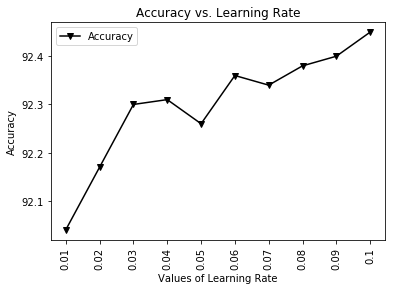

In [60]:
plt.title('Accuracy vs. Learning Rate')
plt.plot(learningrate_tune,Accuracy,'kv-', label='Accuracy')
ax = plt.gca()
ax.set_xticklabels(learningrate_tune,rotation='vertical') # set the labels to display at those ticks
plt.ylabel('Accuracy')
plt.xlabel("Values of Learning Rate")
l = plt.legend()

In [61]:
Accuracy

[92.04,
 92.17,
 92.30000000000001,
 92.31,
 92.25999999999999,
 92.36,
 92.34,
 92.38,
 92.4,
 92.45]

## Testing on MNIST test set

In [64]:
learningRate = 0.1 
for i in range(0,len(y)):
    y_mat = one_hot(y[i],len(np.unique(y)))
    #print (y_mat.shape)
    scores = np.dot(X_bias[i], W_Now)
    prob = softmax(scores)
    
    for j in range (len(np.unique(y))):
        gradient = (-1) * np.dot((y_mat[j] - prob[j]),X_bias[i]) 
        #print (gradient.shape)
        W_Now[:,j]    -= np.dot(learningRate,gradient)
        #print(W_Now[:,j])
        
z_test = np.dot(testX, W_Now)
pred_m_log=[]
for i in tqdm(range(0,len(testY))):
    pred_m_log_raw = softmax(z_test[i])    
    pred_m_log.append(np.argmax(pred_m_log_raw))
# Calculating Accuracy
wrong_values   = 0
right_values   = 0

for i in range(0,len(testY)):
    if (testY[i]==pred_m_log[i]):
        right_values = right_values + 1
    else:
        wrong_values = wrong_values + 1

print("Test Accuracy MNIST: " + str(right_values/(right_values+wrong_values)*100))


100%|██████████| 10000/10000 [00:00<00:00, 38009.10it/s]

Test Accuracy MNIST: 87.53999999999999


In [85]:
pred_list_m_log = list(pred_m_log)

In [66]:
y_actual = pd.Series(testY, name='Actual')
y_predicted = pd.Series(pred_m_log, name='Predicted')
df_confusion_m = pd.crosstab(y_predicted,y_actual, rownames=['Predicted'], colnames=['Actual'], margins=True)
cm_log_m = np.array(df_confusion_m)
print("Confusion matrix:\n%s" % cm_log_m)

Confusion matrix:
[[  971     0    22     4     3    23    49     5    19    17  1113]
 [    0  1116    16     1     5     5     3    16    22    12  1196]
 [    1     2   902    19     5     9    21    17     8     0   984]
 [    2     5    29   923     4    50     2    10    41    11  1077]
 [    0     0    13     1   920    10    21     6    16   121  1108]
 [    2     2     5    33     3   741    61     0    68    17   932]
 [    0     1     4     0     0     3   764     0     3     0   775]
 [    3     2    14    12    10    14     2   958    16   116  1147]
 [    1     7    25    13    10    36    35     5   766    22   920]
 [    0     0     2     4    22     1     0    11    15   693   748]
 [  980  1135  1032  1010   982   892   958  1028   974  1009 10000]]


### Testing on USPS Data

In [67]:
# Processing feature matrix with bias for testing data
test_bias=np.ones((len(USPSMat),1))
test_xprevious_train=USPSMat
testX=np.hstack((test_bias,test_xprevious_train))
testX.shape
testY = USPSTar

In [69]:
# This block of code checks the testing accuracy based on best values of hyperparameters
learningRate = 0.1 
for i in range(0,len(y)):
    y_mat = one_hot(y[i],len(np.unique(y))) #Next we convert the integer class coding into a one-hot representation
    #print (y_mat.shape)
    scores = np.dot(X_bias[i], W_Now) #Then we compute raw class scores given our input and current weights
    #print (scores.shape)
    prob = softmax(scores)
    #loss = (-1) * np.sum(y_mat * np.log(prob))
    
    for j in range (len(np.unique(y))):
        gradient = (-1) * np.dot((y_mat[j] - prob[j]),X_bias[i]) 
        #print (gradient.shape)
        W_Now[:,j]    -= np.dot(learningRate,gradient)
        #print(W_Now[:,j])
        
z_test = np.dot(testX, W_Now)
pred_u_log=[]
for i in tqdm(range(0,len(testY))):
    pred_u_log_raw = softmax(z_test[i])    
    pred_u_log.append(np.argmax(pred_u_log_raw))
#h_test
# Calculating Accuracy
wrong_u   = 0
right_u   = 0

for i in range(0,len(testY)):
    if (testY[i]==pred_u_log[i]):
        right_u = right_u + 1
    else:
        wrong_u = wrong_u + 1

print("Test Accuracy USPS: " + str(right_u/(right_u+wrong_u)*100))


100%|██████████| 19999/19999 [00:00<00:00, 38886.85it/s]

Test Accuracy USPS: 30.831541577078852


In [93]:
pred_list_u_log = list(pred_u_log)

In [70]:
y_actual_u = pd.Series(testY, name='Actual')
y_pred_u = pd.Series(pred_u_log, name='Predicted')
df_confusion_u = pd.crosstab(y_pred_u,y_actual_u, rownames=['Predicted'], colnames=['Actual'], margins=True)
cm_log_u = np.array(df_confusion_u)
print("Confusion matrix:\n%s" % cm_log_u)

Confusion matrix:
[[  533    50   105    53    53    93   298    91   290    26  1592]
 [    3   365    31     8    19     8     5    78    16    26   559]
 [  141   382  1255   304    64   306   678   138   150    90  3508]
 [  147   131   101   725    33   162    87   563   443   467  2859]
 [  116   115    27     8   709    23    65    42   101   101  1307]
 [  287   226   309   734   279  1238   410   207   575   142  4407]
 [   33     9    40     3    19    25   374     6    40     7   556]
 [  480   626    74    95   614    95    25   656   151   809  3625]
 [   99    82    35    49   161    47    16   182   211   232  1114]
 [  161    14    22    21    49     3    42    37    23   100   472]
 [ 2000  2000  1999  2000  2000  2000  2000  2000  2000  2000 19999]]


## Majority Voting

### MNIST

In [102]:
y_svm_m = pd.Series(y_list_svm_m, name='Actual')
y_nn_m = pd.Series(y_list, name='Predicted')
y_rf_m = pd.Series(y_list_rf_m, name='Actual')
y_log_m = pd.Series(pred_list_m_log , name='Predicted')

In [103]:
#from statistics import mode
from collections import Counter
final_pred = []

#for i in range(0,5):
for i in range(0,len(y_log_m)):
    
    c=Counter(np.array([y_svm_m[i], y_nn_m[i], y_rf_m[i], y_log_m[i]]))
    print(c)
    print(max(c))
    final_pred.append(max(c))

Counter({7: 4})
7
Counter({2: 4})
2
Counter({1: 4})
1
Counter({0: 4})
0
Counter({4: 4})
4
Counter({1: 4})
1
Counter({4: 4})
4
Counter({9: 4})
9
Counter({6: 2, 5: 2})
6
Counter({9: 4})
9
Counter({0: 4})
0
Counter({6: 3, 2: 1})
6
Counter({9: 4})
9
Counter({0: 4})
0
Counter({1: 4})
1
Counter({5: 4})
5
Counter({9: 4})
9
Counter({7: 4})
7
Counter({3: 4})
3
Counter({4: 4})
4
Counter({9: 3, 7: 1})
9
Counter({6: 4})
6
Counter({6: 4})
6
Counter({5: 4})
5
Counter({4: 4})
4
Counter({0: 4})
0
Counter({7: 4})
7
Counter({4: 4})
4
Counter({0: 4})
0
Counter({1: 4})
1
Counter({3: 4})
3
Counter({1: 4})
1
Counter({3: 4})
3
Counter({4: 3, 0: 1})
4
Counter({7: 4})
7
Counter({2: 4})
2
Counter({7: 4})
7
Counter({1: 4})
1
Counter({2: 4})
2
Counter({1: 4})
1
Counter({1: 4})
1
Counter({7: 4})
7
Counter({4: 4})
4
Counter({2: 4})
2
Counter({3: 4})
3
Counter({5: 4})
5
Counter({1: 4})
1
Counter({2: 4})
2
Counter({4: 4})
4
Counter({4: 4})
4
Counter({6: 4})
6
Counter({3: 4})
3
Counter({5: 4})
5
Counter({5: 4})
5
Coun

Counter({1: 3, 8: 1})
8
Counter({0: 4})
0
Counter({8: 4})
8
Counter({4: 4})
4
Counter({6: 4})
6
Counter({2: 4})
2
Counter({6: 4})
6
Counter({7: 4})
7
Counter({9: 3, 4: 1})
9
Counter({9: 2, 3: 2})
9
Counter({2: 3, 6: 1})
6
Counter({9: 4})
9
Counter({8: 4})
8
Counter({2: 4})
2
Counter({2: 4})
2
Counter({9: 4})
9
Counter({2: 4})
2
Counter({7: 4})
7
Counter({3: 4})
3
Counter({5: 4})
5
Counter({9: 3, 7: 1})
9
Counter({1: 4})
1
Counter({8: 3, 5: 1})
8
Counter({0: 4})
0
Counter({2: 4})
2
Counter({0: 4})
0
Counter({5: 4})
5
Counter({2: 3, 6: 1})
6
Counter({1: 4})
1
Counter({3: 4})
3
Counter({7: 4})
7
Counter({6: 4})
6
Counter({7: 4})
7
Counter({1: 4})
1
Counter({2: 4})
2
Counter({5: 4})
5
Counter({8: 4})
8
Counter({0: 4})
0
Counter({3: 4})
3
Counter({7: 3, 0: 1})
7
Counter({8: 2, 1: 1, 7: 1})
8
Counter({4: 4})
4
Counter({0: 4})
0
Counter({9: 4})
9
Counter({1: 4})
1
Counter({8: 4})
8
Counter({6: 4})
6
Counter({7: 4})
7
Counter({7: 4})
7
Counter({4: 4})
4
Counter({3: 4})
3
Counter({4: 4})
4
Coun

1
Counter({7: 4})
7
Counter({5: 4})
5
Counter({8: 4})
8
Counter({2: 4})
2
Counter({6: 4})
6
Counter({2: 4})
2
Counter({2: 4})
2
Counter({5: 4})
5
Counter({6: 4})
6
Counter({6: 2, 5: 2})
6
Counter({0: 4})
0
Counter({9: 4})
9
Counter({2: 4})
2
Counter({4: 4})
4
Counter({3: 4})
3
Counter({3: 4})
3
Counter({9: 4})
9
Counter({7: 4})
7
Counter({6: 4})
6
Counter({6: 4})
6
Counter({8: 4})
8
Counter({0: 4})
0
Counter({4: 4})
4
Counter({1: 4})
1
Counter({3: 4})
3
Counter({8: 4})
8
Counter({2: 4})
2
Counter({9: 3, 4: 1})
9
Counter({1: 4})
1
Counter({8: 4})
8
Counter({0: 4})
0
Counter({6: 4})
6
Counter({7: 4})
7
Counter({2: 4})
2
Counter({1: 4})
1
Counter({0: 4})
0
Counter({5: 4})
5
Counter({5: 3, 8: 1})
8
Counter({2: 4})
2
Counter({0: 4})
0
Counter({2: 3, 1: 1})
2
Counter({2: 3, 3: 1})
3
Counter({0: 4})
0
Counter({2: 3, 1: 1})
2
Counter({4: 3, 9: 1})
9
Counter({9: 3, 7: 1})
9
Counter({8: 3, 5: 1})
8
Counter({0: 4})
0
Counter({9: 4})
9
Counter({9: 4})
9
Counter({4: 4})
4
Counter({6: 4})
6
Counter(

0
Counter({8: 4})
8
Counter({4: 4})
4
Counter({8: 4})
8
Counter({2: 4})
2
Counter({7: 4})
7
Counter({4: 4})
4
Counter({5: 4})
5
Counter({2: 4})
2
Counter({0: 4})
0
Counter({3: 4})
3
Counter({2: 2, 9: 1, 7: 1})
9
Counter({9: 4})
9
Counter({6: 3, 2: 1})
6
Counter({7: 4})
7
Counter({2: 4})
2
Counter({5: 4})
5
Counter({1: 3, 2: 1})
2
Counter({1: 4})
1
Counter({1: 4})
1
Counter({2: 4})
2
Counter({3: 4})
3
Counter({6: 4})
6
Counter({7: 4})
7
Counter({8: 4})
8
Counter({7: 4})
7
Counter({6: 3, 4: 1})
6
Counter({4: 4})
4
Counter({8: 4})
8
Counter({9: 4})
9
Counter({4: 4})
4
Counter({8: 4})
8
Counter({6: 4})
6
Counter({3: 4})
3
Counter({8: 4})
8
Counter({3: 4})
3
Counter({1: 4})
1
Counter({0: 4})
0
Counter({6: 4})
6
Counter({2: 4})
2
Counter({2: 4})
2
Counter({5: 4})
5
Counter({6: 4})
6
Counter({9: 4})
9
Counter({5: 3, 0: 1})
5
Counter({8: 4})
8
Counter({1: 4})
1
Counter({4: 4})
4
Counter({1: 4})
1
Counter({7: 4})
7
Counter({8: 4})
8
Counter({4: 4})
4
Counter({6: 4})
6
Counter({1: 4})
1
Counter(

Counter({1: 4})
1
Counter({8: 4})
8
Counter({9: 4})
9
Counter({3: 4})
3
Counter({4: 4})
4
Counter({0: 4})
0
Counter({7: 4})
7
Counter({9: 3, 4: 1})
9
Counter({6: 4})
6
Counter({4: 2, 7: 2})
7
Counter({1: 4})
1
Counter({4: 4})
4
Counter({1: 4})
1
Counter({3: 4})
3
Counter({4: 4})
4
Counter({9: 4})
9
Counter({3: 4})
3
Counter({1: 4})
1
Counter({4: 4})
4
Counter({7: 4})
7
Counter({7: 4})
7
Counter({4: 4})
4
Counter({7: 4})
7
Counter({2: 4})
2
Counter({9: 4})
9
Counter({3: 4})
3
Counter({0: 4})
0
Counter({8: 4})
8
Counter({0: 2, 8: 2})
8
Counter({8: 4})
8
Counter({4: 4})
4
Counter({0: 4})
0
Counter({4: 4})
4
Counter({4: 4})
4
Counter({1: 4})
1
Counter({5: 4})
5
Counter({2: 4})
2
Counter({8: 3, 3: 1})
8
Counter({3: 3, 5: 1})
5
Counter({4: 4})
4
Counter({9: 4})
9
Counter({5: 4})
5
Counter({2: 4})
2
Counter({8: 3, 2: 1})
8
Counter({1: 4})
1
Counter({5: 4})
5
Counter({3: 4})
3
Counter({7: 3, 3: 1})
7
Counter({9: 3, 1: 1})
9
Counter({4: 4})
4
Counter({2: 4})
2
Counter({5: 4})
5
Counter({6: 4})


Counter({9: 4})
9
Counter({5: 4})
5
Counter({3: 4})
3
Counter({4: 4})
4
Counter({6: 4})
6
Counter({5: 4})
5
Counter({0: 4})
0
Counter({1: 4})
1
Counter({8: 4})
8
Counter({8: 4})
8
Counter({2: 4})
2
Counter({3: 2, 8: 1, 0: 1})
8
Counter({3: 4})
3
Counter({5: 4})
5
Counter({7: 4})
7
Counter({8: 4})
8
Counter({0: 4})
0
Counter({8: 4})
8
Counter({5: 4})
5
Counter({7: 4})
7
Counter({1: 4})
1
Counter({1: 4})
1
Counter({0: 4})
0
Counter({1: 4})
1
Counter({3: 4})
3
Counter({7: 4})
7
Counter({8: 4})
8
Counter({5: 4})
5
Counter({0: 4})
0
Counter({7: 4})
7
Counter({1: 4})
1
Counter({1: 4})
1
Counter({0: 4})
0
Counter({1: 4})
1
Counter({1: 4})
1
Counter({4: 4})
4
Counter({5: 4})
5
Counter({2: 4})
2
Counter({7: 3, 3: 1})
7
Counter({6: 4})
6
Counter({2: 4})
2
Counter({3: 4})
3
Counter({0: 4})
0
Counter({2: 4})
2
Counter({8: 4})
8
Counter({5: 4})
5
Counter({9: 4})
9
Counter({6: 3, 0: 1})
6
Counter({9: 4})
9
Counter({7: 4})
7
Counter({2: 4})
2
Counter({1: 4})
1
Counter({3: 4})
3
Counter({6: 4})
6
Coun

2
Counter({5: 4})
5
Counter({4: 3, 9: 1})
9
Counter({0: 4})
0
Counter({8: 4})
8
Counter({8: 4})
8
Counter({4: 4})
4
Counter({5: 2, 6: 1, 0: 1})
6
Counter({8: 4})
8
Counter({8: 4})
8
Counter({4: 4})
4
Counter({5: 4})
5
Counter({4: 4})
4
Counter({8: 2, 5: 2})
8
Counter({5: 4})
5
Counter({4: 4})
4
Counter({9: 3, 7: 1})
9
Counter({2: 4})
2
Counter({2: 4})
2
Counter({1: 4})
1
Counter({2: 4})
2
Counter({6: 4})
6
Counter({8: 4})
8
Counter({8: 4})
8
Counter({7: 4})
7
Counter({0: 4})
0
Counter({3: 4})
3
Counter({6: 4})
6
Counter({6: 4})
6
Counter({4: 4})
4
Counter({3: 4})
3
Counter({8: 4})
8
Counter({8: 4})
8
Counter({7: 4})
7
Counter({2: 4})
2
Counter({2: 4})
2
Counter({0: 4})
0
Counter({0: 4})
0
Counter({9: 4})
9
Counter({3: 4})
3
Counter({9: 3, 7: 1})
9
Counter({9: 3, 0: 1})
9
Counter({1: 4})
1
Counter({9: 4})
9
Counter({8: 4})
8
Counter({6: 4})
6
Counter({6: 3, 8: 1})
8
Counter({4: 4})
4
Counter({2: 4})
2
Counter({6: 4})
6
Counter({9: 4})
9
Counter({2: 4})
2
Counter({8: 3, 7: 1})
8
Counter(

6
Counter({8: 4})
8
Counter({2: 4})
2
Counter({2: 4})
2
Counter({7: 4})
7
Counter({7: 4})
7
Counter({4: 4})
4
Counter({0: 4})
0
Counter({2: 4})
2
Counter({4: 4})
4
Counter({2: 4})
2
Counter({1: 4})
1
Counter({8: 4})
8
Counter({9: 3, 4: 1})
9
Counter({6: 4})
6
Counter({1: 4})
1
Counter({0: 4})
0
Counter({5: 4})
5
Counter({9: 3, 4: 1})
9
Counter({6: 3, 0: 1})
6
Counter({9: 4})
9
Counter({8: 3, 5: 1})
8
Counter({0: 4})
0
Counter({3: 2, 5: 1, 2: 1})
5
Counter({0: 4})
0
Counter({8: 4})
8
Counter({3: 3, 5: 1})
5
Counter({9: 3, 4: 1})
9
Counter({6: 3, 0: 1})
6
Counter({3: 4})
3
Counter({0: 4})
0
Counter({1: 4})
1
Counter({2: 4})
2
Counter({3: 4})
3
Counter({4: 4})
4
Counter({5: 4})
5
Counter({6: 4})
6
Counter({7: 4})
7
Counter({0: 4})
0
Counter({1: 4})
1
Counter({2: 4})
2
Counter({3: 4})
3
Counter({4: 4})
4
Counter({5: 4})
5
Counter({6: 4})
6
Counter({7: 4})
7
Counter({8: 4})
8
Counter({9: 3, 4: 1})
9
Counter({0: 4})
0
Counter({1: 4})
1
Counter({2: 4})
2
Counter({3: 4})
3
Counter({4: 4})
4
Co

Counter({5: 3, 3: 1})
5
Counter({9: 4})
9
Counter({9: 4})
9
Counter({0: 4})
0
Counter({9: 4})
9
Counter({1: 4})
1
Counter({1: 4})
1
Counter({5: 4})
5
Counter({8: 4})
8
Counter({8: 4})
8
Counter({6: 4})
6
Counter({3: 4})
3
Counter({2: 4})
2
Counter({1: 4})
1
Counter({8: 4})
8
Counter({3: 4})
3
Counter({2: 4})
2
Counter({6: 4})
6
Counter({5: 4})
5
Counter({6: 4})
6
Counter({9: 2, 0: 2})
9
Counter({0: 3, 4: 1})
4
Counter({1: 4})
1
Counter({0: 4})
0
Counter({3: 2, 5: 2})
5
Counter({3: 4})
3
Counter({1: 4})
1
Counter({9: 4})
9
Counter({2: 4})
2
Counter({1: 4})
1
Counter({9: 4})
9
Counter({6: 4})
6
Counter({0: 4})
0
Counter({4: 4})
4
Counter({6: 4})
6
Counter({1: 4})
1
Counter({7: 4})
7
Counter({3: 4})
3
Counter({8: 4})
8
Counter({7: 4})
7
Counter({2: 4})
2
Counter({9: 4})
9
Counter({6: 4})
6
Counter({5: 4})
5
Counter({8: 3, 5: 1})
8
Counter({3: 3, 0: 1})
3
Counter({3: 2, 5: 2})
5
Counter({7: 4})
7
Counter({1: 4})
1
Counter({6: 4})
6
Counter({1: 4})
1
Counter({0: 4})
0
Counter({9: 4})
9
Coun

Counter({8: 3, 9: 1})
9
Counter({1: 4})
1
Counter({7: 4})
7
Counter({5: 4})
5
Counter({0: 4})
0
Counter({1: 4})
1
Counter({1: 4})
1
Counter({3: 3, 5: 1})
5
Counter({4: 2, 8: 1, 7: 1})
8
Counter({4: 4})
4
Counter({9: 3, 4: 1})
9
Counter({1: 4})
1
Counter({8: 4})
8
Counter({6: 4})
6
Counter({8: 4})
8
Counter({9: 2, 5: 2})
9
Counter({0: 4})
0
Counter({1: 4})
1
Counter({2: 4})
2
Counter({3: 4})
3
Counter({4: 4})
4
Counter({5: 4})
5
Counter({6: 4})
6
Counter({7: 4})
7
Counter({5: 4})
5
Counter({9: 3, 4: 1})
9
Counter({0: 4})
0
Counter({1: 4})
1
Counter({2: 3, 8: 1})
8
Counter({3: 4})
3
Counter({4: 4})
4
Counter({7: 4})
7
Counter({8: 4})
8
Counter({9: 4})
9
Counter({5: 3, 4: 1})
5
Counter({1: 4})
1
Counter({7: 4})
7
Counter({8: 4})
8
Counter({9: 4})
9
Counter({9: 4})
9
Counter({8: 3, 5: 1})
8
Counter({9: 4})
9
Counter({8: 4})
8
Counter({4: 4})
4
Counter({1: 4})
1
Counter({7: 4})
7
Counter({7: 4})
7
Counter({3: 4})
3
Counter({3: 4})
3
Counter({7: 4})
7
Counter({6: 3, 5: 1})
6
Counter({6: 3, 5

4
Counter({0: 4})
0
Counter({0: 4})
0
Counter({8: 4})
8
Counter({8: 4})
8
Counter({8: 4})
8
Counter({5: 4})
5
Counter({1: 4})
1
Counter({3: 4})
3
Counter({7: 4})
7
Counter({4: 4})
4
Counter({9: 3, 7: 1})
9
Counter({8: 4})
8
Counter({8: 4})
8
Counter({9: 4})
9
Counter({0: 4})
0
Counter({9: 4})
9
Counter({8: 4})
8
Counter({9: 3, 8: 1})
9
Counter({0: 4})
0
Counter({2: 4})
2
Counter({6: 4})
6
Counter({5: 4})
5
Counter({6: 4})
6
Counter({7: 4})
7
Counter({4: 4})
4
Counter({7: 4})
7
Counter({5: 4})
5
Counter({4: 4})
4
Counter({1: 4})
1
Counter({3: 4})
3
Counter({5: 4})
5
Counter({3: 4})
3
Counter({1: 4})
1
Counter({2: 4})
2
Counter({3: 4})
3
Counter({4: 4})
4
Counter({5: 4})
5
Counter({6: 3, 4: 1})
6
Counter({1: 4})
1
Counter({2: 4})
2
Counter({3: 4})
3
Counter({4: 4})
4
Counter({6: 4})
6
Counter({0: 4})
0
Counter({1: 4})
1
Counter({2: 4})
2
Counter({4: 4})
4
Counter({5: 4})
5
Counter({6: 4})
6
Counter({7: 4})
7
Counter({8: 4})
8
Counter({1: 4})
1
Counter({7: 4})
7
Counter({2: 4})
2
Counter(

6
Counter({0: 4})
0
Counter({1: 4})
1
Counter({2: 4})
2
Counter({3: 4})
3
Counter({4: 4})
4
Counter({5: 4})
5
Counter({6: 4})
6
Counter({7: 4})
7
Counter({8: 4})
8
Counter({9: 4})
9
Counter({0: 4})
0
Counter({1: 4})
1
Counter({2: 4})
2
Counter({3: 4})
3
Counter({4: 4})
4
Counter({5: 4})
5
Counter({6: 4})
6
Counter({7: 4})
7
Counter({8: 4})
8
Counter({9: 4})
9
Counter({0: 4})
0
Counter({1: 4})
1
Counter({2: 4})
2
Counter({3: 4})
3
Counter({4: 4})
4
Counter({5: 4})
5
Counter({6: 4})
6
Counter({7: 4})
7
Counter({8: 4})
8
Counter({9: 4})
9
Counter({8: 4})
8
Counter({6: 4})
6
Counter({5: 4})
5
Counter({9: 4})
9
Counter({7: 4})
7
Counter({0: 4})
0
Counter({2: 4})
2
Counter({3: 4})
3
Counter({4: 4})
4
Counter({3: 3, 9: 1})
9
Counter({8: 4})
8
Counter({5: 4})
5
Counter({1: 4})
1
Counter({5: 4})
5
Counter({2: 4})
2
Counter({3: 4})
3
Counter({0: 4})
0
Counter({1: 4})
1
Counter({2: 4})
2
Counter({1: 4})
1
Counter({3: 4})
3
Counter({2: 4})
2
Counter({6: 4})
6
Counter({5: 4})
5
Counter({3: 4})
3
Co

Counter({8: 4})
8
Counter({3: 4})
3
Counter({0: 4})
0
Counter({6: 4})
6
Counter({2: 4})
2
Counter({7: 4})
7
Counter({8: 4})
8
Counter({1: 4})
1
Counter({7: 4})
7
Counter({1: 4})
1
Counter({3: 4})
3
Counter({8: 4})
8
Counter({5: 4})
5
Counter({4: 4})
4
Counter({2: 4})
2
Counter({0: 4})
0
Counter({9: 4})
9
Counter({7: 4})
7
Counter({6: 4})
6
Counter({7: 4})
7
Counter({4: 4})
4
Counter({1: 4})
1
Counter({6: 4})
6
Counter({2: 4})
2
Counter({6: 4})
6
Counter({7: 4})
7
Counter({1: 4})
1
Counter({9: 4})
9
Counter({8: 4})
8
Counter({0: 4})
0
Counter({6: 4})
6
Counter({9: 4})
9
Counter({4: 4})
4
Counter({9: 4})
9
Counter({9: 4})
9
Counter({6: 4})
6
Counter({2: 4})
2
Counter({3: 4})
3
Counter({7: 4})
7
Counter({1: 4})
1
Counter({9: 3, 4: 1})
9
Counter({2: 4})
2
Counter({2: 4})
2
Counter({5: 4})
5
Counter({3: 4})
3
Counter({7: 4})
7
Counter({8: 4})
8
Counter({0: 4})
0
Counter({1: 4})
1
Counter({2: 4})
2
Counter({3: 4})
3
Counter({4: 4})
4
Counter({7: 4})
7
Counter({8: 4})
8
Counter({9: 4})
9
Coun

Counter({0: 4})
0
Counter({1: 4})
1
Counter({0: 3, 2: 1})
2
Counter({3: 4})
3
Counter({4: 4})
4
Counter({5: 3, 0: 1})
5
Counter({6: 4})
6
Counter({7: 4})
7
Counter({8: 4})
8
Counter({9: 4})
9
Counter({0: 4})
0
Counter({1: 4})
1
Counter({2: 4})
2
Counter({3: 4})
3
Counter({4: 4})
4
Counter({6: 4})
6
Counter({6: 4})
6
Counter({7: 4})
7
Counter({8: 4})
8
Counter({9: 3, 8: 1})
9
Counter({7: 4})
7
Counter({4: 3, 1: 1})
4
Counter({6: 3, 5: 1})
6
Counter({1: 4})
1
Counter({4: 4})
4
Counter({0: 4})
0
Counter({9: 3, 4: 1})
9
Counter({9: 3, 7: 1})
9
Counter({3: 3, 8: 1})
8
Counter({7: 4})
7
Counter({8: 3, 1: 1})
8
Counter({2: 3, 0: 1})
2
Counter({7: 4})
7
Counter({5: 4})
5
Counter({8: 4})
8
Counter({0: 2, 6: 1, 5: 1})
6
Counter({3: 4})
3
Counter({2: 2, 0: 2})
2
Counter({2: 2, 0: 2})
2
Counter({0: 4})
0
Counter({5: 4})
5
Counter({8: 4})
8
Counter({6: 4})
6
Counter({0: 4})
0
Counter({3: 4})
3
Counter({8: 4})
8
Counter({1: 4})
1
Counter({0: 4})
0
Counter({3: 4})
3
Counter({0: 4})
0
Counter({4: 3, 8

In [104]:
# Calculating Accuracy
wrong_values   = 0
right_values   = 0

for i in range(0,len(y_test)):
    if (y_test[i]==final_pred[i]):
        right_values = right_values + 1
    else:
        wrong_values = wrong_values + 1

print("Combined Test Accuracy MNIST: " + str(right_values/(right_values+wrong_values)*100))

Combined Test Accuracy MNIST: 94.85


In [107]:
# Confusion Matrix
y_actual_com_m = pd.Series(y_test, name='Actual')
y_predicted_com_m = pd.Series(final_pred, name='Predicted')
df_confusion_com_m = pd.crosstab(y_predicted_com_m,y_actual_com_m, rownames=['Predicted'], colnames=['Actual'], margins=True)
cm_com_m = np.array(df_confusion_com_m)
print("Confusion matrix:\n%s" % cm_com_m)

Confusion matrix:
[[  964     0     1     0     0     2     4     0     2     2   975]
 [    0  1111     0     0     0     0     1     0     0     2  1114]
 [    0     2   927     1     1     0     1     4     1     0   937]
 [    0     6    31   925     0     3     0     3     2     2   972]
 [    2     0    11     1   916     0     2     0     1     4   937]
 [    2     1     3    35     3   814     2     0     3     2   865]
 [    4     3     9     0     7    11   910     0     0     1   945]
 [    3     2    17    17    12    14     2   990     2     4  1063]
 [    5     9    31    19    10    41    36     6   938     2  1097]
 [    0     1     2    12    33     7     0    25    25   990  1095]
 [  980  1135  1032  1010   982   892   958  1028   974  1009 10000]]


### USPS

In [108]:
y_svm_u = pd.Series(y_list_svm_u, name='Actual')
y_nn_u = pd.Series(y_list_u, name='Predicted')
y_rf_u = pd.Series(y_list_rf_u, name='Actual')
y_log_u = pd.Series(pred_list_u_log , name='Predicted')

In [109]:
#from statistics import mode
from collections import Counter
final_pred1 = []

#for i in range(0,5):
for i in range(0,len(y_log_u)):
    
    c=Counter(np.array([y_svm_u[i], y_nn_u[i], y_rf_u[i], y_log_u[i]]))
    print(c)
    print(max(c))
    final_pred1.append(max(c))

Counter({4: 2, 9: 1, 7: 1})
9
Counter({2: 2, 6: 1, 0: 1})
6
Counter({0: 4})
0
Counter({0: 3, 5: 1})
5
Counter({9: 2, 8: 1, 5: 1})
9
Counter({0: 3, 3: 1})
3
Counter({2: 3, 0: 1})
2
Counter({9: 3, 7: 1})
9
Counter({7: 2, 8: 1, 2: 1})
8
Counter({2: 2, 4: 2})
4
Counter({2: 1, 4: 1, 9: 1, 7: 1})
9
Counter({0: 4})
0
Counter({2: 3, 9: 1})
9
Counter({2: 1, 5: 1, 1: 1, 3: 1})
5
Counter({6: 1, 5: 1, 0: 1, 8: 1})
8
Counter({5: 4})
5
Counter({9: 2, 4: 1, 7: 1})
9
Counter({9: 3, 4: 1})
9
Counter({9: 2, 4: 2})
9
Counter({5: 2, 0: 2})
5
Counter({9: 3, 0: 1})
9
Counter({4: 1, 9: 1, 5: 1, 7: 1})
9
Counter({0: 4})
0
Counter({2: 3, 3: 1})
3
Counter({5: 2, 0: 1, 6: 1})
6
Counter({9: 4})
9
Counter({5: 2, 2: 1, 4: 1})
5
Counter({6: 2, 2: 1, 4: 1})
6
Counter({0: 4})
0
Counter({4: 2, 7: 2})
7
Counter({0: 3, 6: 1})
6
Counter({0: 2, 5: 2})
5
Counter({9: 3, 4: 1})
9
Counter({5: 1, 6: 1, 4: 1, 7: 1})
7
Counter({2: 1, 5: 1, 0: 1, 3: 1})
5
Counter({0: 4})
0
Counter({5: 2, 4: 1, 0: 1})
5
Counter({2: 2, 0: 1, 6: 1})


9
Counter({0: 4})
0
Counter({0: 4})
0
Counter({0: 4})
0
Counter({2: 2, 3: 1, 1: 1})
3
Counter({0: 3, 5: 1})
5
Counter({8: 2, 4: 1, 7: 1})
8
Counter({2: 3, 7: 1})
7
Counter({4: 3, 7: 1})
7
Counter({0: 4})
0
Counter({2: 1, 8: 1, 4: 1, 7: 1})
8
Counter({5: 2, 9: 1, 7: 1})
9
Counter({0: 3, 9: 1})
9
Counter({5: 2, 2: 1, 6: 1})
6
Counter({0: 3, 6: 1})
6
Counter({0: 4})
0
Counter({6: 3, 4: 1})
6
Counter({7: 4})
7
Counter({0: 3, 5: 1})
5
Counter({9: 2, 2: 1, 7: 1})
9
Counter({0: 4})
0
Counter({9: 3, 7: 1})
9
Counter({0: 4})
0
Counter({2: 3, 6: 1})
6
Counter({4: 2, 0: 1, 9: 1})
9
Counter({2: 2, 3: 1, 8: 1})
8
Counter({4: 1, 6: 1, 2: 1, 7: 1})
7
Counter({9: 4})
9
Counter({5: 2, 9: 2})
9
Counter({3: 2, 2: 1, 0: 1})
3
Counter({2: 2, 0: 1, 7: 1})
7
Counter({0: 3, 5: 1})
5
Counter({2: 1, 8: 1, 3: 1, 5: 1})
8
Counter({0: 3, 2: 1})
2
Counter({2: 2, 9: 2})
9
Counter({9: 3, 4: 1})
9
Counter({9: 3, 1: 1})
9
Counter({0: 3, 7: 1})
7
Counter({6: 2, 5: 1, 0: 1})
6
Counter({0: 3, 9: 1})
9
Counter({9: 2, 4: 1,

2
Counter({0: 3, 3: 1})
3
Counter({0: 3, 6: 1})
6
Counter({7: 2, 2: 1, 5: 1})
7
Counter({2: 2, 5: 1, 0: 1})
5
Counter({0: 3, 7: 1})
7
Counter({2: 3, 4: 1})
4
Counter({9: 3, 7: 1})
9
Counter({3: 2, 2: 1, 0: 1})
3
Counter({2: 2, 7: 1, 4: 1})
7
Counter({4: 3, 3: 1})
4
Counter({0: 4})
0
Counter({0: 4})
0
Counter({5: 2, 8: 1, 9: 1})
9
Counter({0: 3, 6: 1})
6
Counter({3: 2, 4: 1, 5: 1})
5
Counter({2: 2, 7: 1, 5: 1})
7
Counter({4: 2, 9: 1, 7: 1})
9
Counter({7: 2, 9: 1, 2: 1})
9
Counter({0: 4})
0
Counter({0: 3, 6: 1})
6
Counter({4: 2, 2: 1, 8: 1})
8
Counter({0: 4})
0
Counter({5: 3, 0: 1})
5
Counter({9: 2, 4: 1, 7: 1})
9
Counter({0: 4})
0
Counter({0: 1, 7: 1, 3: 1, 5: 1})
7
Counter({5: 2, 6: 1, 7: 1})
7
Counter({0: 4})
0
Counter({0: 4})
0
Counter({5: 3, 4: 1})
5
Counter({9: 2, 5: 1, 7: 1})
9
Counter({5: 2, 4: 2})
5
Counter({0: 3, 4: 1})
4
Counter({9: 2, 2: 1, 0: 1})
9
Counter({0: 4})
0
Counter({0: 4})
0
Counter({4: 3, 8: 1})
8
Counter({5: 1, 4: 1, 0: 1, 7: 1})
7
Counter({3: 2, 2: 1, 4: 1})
4
Co

Counter({8: 2, 5: 1, 4: 1})
8
Counter({2: 3, 7: 1})
7
Counter({5: 4})
5
Counter({7: 2, 1: 2})
7
Counter({7: 4})
7
Counter({1: 2, 2: 2})
2
Counter({7: 4})
7
Counter({2: 2, 1: 2})
2
Counter({2: 2, 4: 1, 7: 1})
7
Counter({4: 2, 7: 1, 5: 1})
7
Counter({1: 4})
1
Counter({5: 2, 3: 2})
5
Counter({7: 3, 4: 1})
7
Counter({5: 2, 2: 1, 0: 1})
5
Counter({2: 4})
2
Counter({1: 3, 2: 1})
2
Counter({4: 2, 2: 1, 7: 1})
7
Counter({7: 2, 2: 1, 5: 1})
7
Counter({7: 3, 0: 1})
7
Counter({2: 2, 1: 1, 0: 1})
2
Counter({5: 3, 1: 1})
5
Counter({5: 2, 4: 2})
5
Counter({1: 3, 7: 1})
7
Counter({7: 4})
7
Counter({2: 4})
2
Counter({7: 4})
7
Counter({5: 3, 7: 1})
7
Counter({7: 3, 4: 1})
7
Counter({1: 4})
1
Counter({5: 3, 7: 1})
7
Counter({5: 2, 0: 1, 7: 1})
7
Counter({1: 4})
1
Counter({1: 4})
1
Counter({9: 2, 1: 2})
9
Counter({2: 3, 0: 1})
2
Counter({7: 2, 2: 2})
7
Counter({7: 2, 3: 1, 2: 1})
7
Counter({4: 3, 1: 1})
4
Counter({7: 3, 4: 1})
7
Counter({5: 2, 8: 1, 4: 1})
8
Counter({7: 2, 9: 1, 0: 1})
9
Counter({1: 4})


Counter({1: 4})
1
Counter({3: 3, 1: 1})
3
Counter({2: 2, 5: 1, 1: 1})
5
Counter({7: 4})
7
Counter({3: 3, 1: 1})
3
Counter({7: 4})
7
Counter({5: 3, 0: 1})
5
Counter({3: 2, 2: 1, 7: 1})
7
Counter({7: 1, 6: 1, 4: 1, 2: 1})
7
Counter({0: 3, 2: 1})
2
Counter({1: 4})
1
Counter({5: 3, 0: 1})
5
Counter({5: 3, 1: 1})
5
Counter({3: 2, 7: 2})
7
Counter({0: 2, 2: 1, 3: 1})
3
Counter({1: 4})
1
Counter({7: 3, 1: 1})
7
Counter({5: 2, 0: 1, 7: 1})
7
Counter({7: 4})
7
Counter({1: 3, 8: 1})
8
Counter({1: 4})
1
Counter({7: 3, 2: 1})
7
Counter({7: 3, 4: 1})
7
Counter({3: 1, 9: 1, 1: 1, 7: 1})
9
Counter({0: 1, 4: 1, 7: 1, 5: 1})
7
Counter({7: 4})
7
Counter({1: 4})
1
Counter({7: 3, 1: 1})
7
Counter({3: 3, 2: 1})
3
Counter({5: 2, 2: 1, 0: 1})
5
Counter({1: 3, 3: 1})
3
Counter({1: 3, 2: 1})
2
Counter({1: 2, 8: 1, 5: 1})
8
Counter({7: 4})
7
Counter({1: 4})
1
Counter({1: 1, 9: 1, 3: 1, 7: 1})
9
Counter({1: 4})
1
Counter({7: 2, 2: 1, 8: 1})
8
Counter({2: 3, 1: 1})
2
Counter({7: 3, 4: 1})
7
Counter({1: 4})
1
Coun

9
Counter({5: 3, 7: 1})
7
Counter({7: 2, 9: 1, 2: 1})
9
Counter({4: 2, 7: 1, 2: 1})
7
Counter({1: 3, 2: 1})
2
Counter({3: 2, 1: 1, 7: 1})
7
Counter({7: 3, 4: 1})
7
Counter({1: 2, 2: 2})
2
Counter({7: 4})
7
Counter({4: 2, 2: 1, 9: 1})
9
Counter({1: 3, 8: 1})
8
Counter({4: 2, 7: 2})
7
Counter({1: 4})
1
Counter({7: 3, 4: 1})
7
Counter({5: 3, 0: 1})
5
Counter({7: 2, 4: 1, 1: 1})
7
Counter({2: 2, 0: 1, 7: 1})
7
Counter({2: 3, 7: 1})
7
Counter({6: 2, 7: 2})
7
Counter({3: 4})
3
Counter({3: 3, 7: 1})
7
Counter({4: 1, 1: 1, 7: 1, 8: 1})
8
Counter({3: 3, 7: 1})
7
Counter({7: 4})
7
Counter({7: 3, 4: 1})
7
Counter({2: 2, 5: 1, 4: 1})
5
Counter({4: 2, 7: 2})
7
Counter({0: 2, 5: 2})
5
Counter({1: 2, 5: 1, 2: 1})
5
Counter({0: 1, 4: 1, 7: 1, 3: 1})
7
Counter({1: 4})
1
Counter({1: 3, 2: 1})
2
Counter({3: 2, 1: 2})
3
Counter({3: 2, 1: 1, 2: 1})
3
Counter({1: 3, 3: 1})
3
Counter({1: 2, 7: 2})
7
Counter({3: 2, 4: 1, 1: 1})
4
Counter({1: 4})
1
Counter({7: 2, 3: 1, 1: 1})
7
Counter({7: 3, 5: 1})
7
Counter(

2
Counter({0: 2, 5: 2})
5
Counter({2: 2, 5: 2})
5
Counter({5: 2, 3: 1, 2: 1})
5
Counter({2: 4})
2
Counter({7: 3, 2: 1})
7
Counter({2: 2, 3: 2})
3
Counter({2: 2, 9: 1, 3: 1})
9
Counter({4: 2, 7: 1, 9: 1})
9
Counter({2: 2, 5: 1, 6: 1})
6
Counter({0: 3, 2: 1})
2
Counter({2: 3, 3: 1})
3
Counter({2: 3, 0: 1})
2
Counter({2: 2, 3: 1, 1: 1})
3
Counter({2: 3, 0: 1})
2
Counter({2: 4})
2
Counter({2: 3, 5: 1})
5
Counter({7: 4})
7
Counter({2: 2, 3: 1, 5: 1})
5
Counter({2: 4})
2
Counter({2: 3, 7: 1})
7
Counter({2: 4})
2
Counter({2: 3, 8: 1})
8
Counter({2: 2, 4: 1, 5: 1})
5
Counter({2: 4})
2
Counter({2: 4})
2
Counter({2: 4})
2
Counter({2: 2, 0: 2})
2
Counter({2: 4})
2
Counter({0: 2, 5: 1, 2: 1})
5
Counter({6: 3, 4: 1})
6
Counter({2: 2, 1: 2})
2
Counter({5: 2, 3: 1, 7: 1})
7
Counter({6: 2, 2: 1, 0: 1})
6
Counter({2: 2, 4: 1, 5: 1})
5
Counter({2: 3, 6: 1})
6
Counter({3: 2, 4: 1, 5: 1})
5
Counter({2: 2, 5: 2})
5
Counter({2: 3, 1: 1})
2
Counter({2: 3, 7: 1})
7
Counter({2: 4})
2
Counter({2: 3, 1: 1})
2
Co

Counter({5: 2, 6: 1, 2: 1})
6
Counter({2: 3, 5: 1})
5
Counter({2: 3, 0: 1})
2
Counter({4: 3, 2: 1})
4
Counter({2: 4})
2
Counter({2: 3, 5: 1})
5
Counter({5: 1, 2: 1, 0: 1, 6: 1})
6
Counter({2: 2, 7: 1, 0: 1})
7
Counter({2: 2, 8: 2})
8
Counter({2: 2, 3: 1, 5: 1})
5
Counter({5: 3, 4: 1})
5
Counter({2: 3, 1: 1})
2
Counter({2: 3, 9: 1})
9
Counter({2: 3, 1: 1})
2
Counter({2: 3, 3: 1})
3
Counter({2: 3, 4: 1})
4
Counter({2: 3, 1: 1})
2
Counter({2: 4})
2
Counter({2: 4})
2
Counter({3: 2, 5: 1, 7: 1})
7
Counter({2: 4})
2
Counter({2: 2, 3: 1, 1: 1})
3
Counter({2: 3, 5: 1})
5
Counter({2: 4})
2
Counter({2: 3, 8: 1})
8
Counter({2: 4})
2
Counter({2: 3, 1: 1})
2
Counter({2: 2, 6: 1, 5: 1})
6
Counter({3: 3, 7: 1})
7
Counter({5: 1, 4: 1, 2: 1, 8: 1})
8
Counter({2: 3, 5: 1})
5
Counter({4: 2, 5: 1, 8: 1})
8
Counter({2: 4})
2
Counter({2: 4})
2
Counter({2: 4})
2
Counter({2: 4})
2
Counter({2: 3, 0: 1})
2
Counter({2: 4})
2
Counter({5: 3, 3: 1})
5
Counter({4: 3, 8: 1})
8
Counter({6: 1, 3: 1, 7: 1, 5: 1})
7
Coun

Counter({3: 3, 2: 1})
3
Counter({5: 3, 3: 1})
5
Counter({3: 3, 2: 1})
3
Counter({3: 4})
3
Counter({3: 3, 2: 1})
3
Counter({3: 2, 5: 1, 2: 1})
5
Counter({3: 3, 5: 1})
5
Counter({5: 2, 3: 2})
5
Counter({3: 2, 8: 2})
8
Counter({3: 4})
3
Counter({2: 1, 8: 1, 1: 1, 0: 1})
8
Counter({5: 2, 8: 1, 3: 1})
8
Counter({5: 3, 3: 1})
5
Counter({3: 2, 5: 2})
5
Counter({5: 3, 3: 1})
5
Counter({2: 2, 5: 1, 3: 1})
5
Counter({3: 4})
3
Counter({3: 2, 5: 1, 2: 1})
5
Counter({2: 3, 9: 1})
9
Counter({4: 3, 3: 1})
4
Counter({2: 3, 0: 1})
2
Counter({2: 2, 3: 1, 9: 1})
9
Counter({3: 3, 2: 1})
3
Counter({5: 2, 3: 2})
5
Counter({3: 3, 2: 1})
3
Counter({5: 2, 3: 1, 8: 1})
8
Counter({3: 2, 2: 2})
3
Counter({5: 2, 3: 1, 9: 1})
9
Counter({3: 3, 4: 1})
4
Counter({3: 4})
3
Counter({5: 3, 3: 1})
5
Counter({3: 2, 8: 1, 5: 1})
8
Counter({3: 2, 5: 2})
5
Counter({5: 3, 2: 1})
5
Counter({5: 2, 3: 2})
5
Counter({3: 3, 5: 1})
5
Counter({2: 2, 3: 1, 4: 1})
4
Counter({5: 4})
5
Counter({3: 3, 5: 1})
5
Counter({8: 2, 3: 1, 4: 1})


3
Counter({3: 3, 5: 1})
5
Counter({2: 3, 5: 1})
5
Counter({3: 3, 5: 1})
5
Counter({3: 3, 5: 1})
5
Counter({5: 3, 3: 1})
5
Counter({3: 3, 2: 1})
3
Counter({3: 3, 2: 1})
3
Counter({3: 3, 2: 1})
3
Counter({5: 2, 3: 1, 8: 1})
8
Counter({3: 3, 5: 1})
5
Counter({3: 2, 2: 2})
3
Counter({3: 2, 5: 1, 7: 1})
7
Counter({2: 2, 5: 1, 3: 1})
5
Counter({3: 2, 5: 1, 7: 1})
7
Counter({3: 3, 5: 1})
5
Counter({3: 3, 8: 1})
8
Counter({3: 3, 5: 1})
5
Counter({2: 2, 8: 1, 5: 1})
8
Counter({2: 2, 3: 2})
3
Counter({5: 3, 3: 1})
5
Counter({3: 2, 2: 1, 5: 1})
5
Counter({3: 3, 5: 1})
5
Counter({3: 4})
3
Counter({3: 2, 5: 2})
5
Counter({3: 2, 5: 2})
5
Counter({5: 4})
5
Counter({3: 3, 5: 1})
5
Counter({3: 3, 2: 1})
3
Counter({5: 2, 8: 1, 7: 1})
8
Counter({3: 2, 5: 1, 9: 1})
9
Counter({3: 3, 5: 1})
5
Counter({5: 2, 3: 2})
5
Counter({3: 4})
3
Counter({5: 2, 3: 2})
5
Counter({5: 3, 0: 1})
5
Counter({3: 4})
3
Counter({2: 2, 3: 1, 5: 1})
5
Counter({3: 4})
3
Counter({2: 1, 8: 1, 4: 1, 5: 1})
8
Counter({3: 4})
3
Counter(

3
Counter({3: 3, 2: 1})
3
Counter({2: 1, 1: 1, 3: 1, 5: 1})
5
Counter({3: 3, 0: 1})
3
Counter({5: 3, 3: 1})
5
Counter({3: 3, 5: 1})
5
Counter({3: 3, 0: 1})
3
Counter({2: 3, 0: 1})
2
Counter({3: 3, 2: 1})
3
Counter({3: 3, 0: 1})
3
Counter({3: 4})
3
Counter({3: 2, 2: 2})
3
Counter({3: 3, 0: 1})
3
Counter({5: 4})
5
Counter({3: 4})
3
Counter({3: 3, 5: 1})
5
Counter({3: 3, 2: 1})
3
Counter({3: 3, 5: 1})
5
Counter({3: 2, 5: 1, 7: 1})
7
Counter({3: 2, 5: 1, 7: 1})
7
Counter({3: 4})
3
Counter({3: 2, 5: 1, 2: 1})
5
Counter({2: 3, 3: 1})
3
Counter({3: 4})
3
Counter({5: 2, 3: 2})
5
Counter({3: 3, 5: 1})
5
Counter({2: 1, 6: 1, 9: 1, 0: 1})
9
Counter({3: 4})
3
Counter({3: 3, 2: 1})
3
Counter({3: 4})
3
Counter({5: 3, 2: 1})
5
Counter({3: 3, 0: 1})
3
Counter({3: 4})
3
Counter({3: 3, 7: 1})
7
Counter({3: 4})
3
Counter({5: 3, 2: 1})
5
Counter({5: 2, 3: 1, 0: 1})
5
Counter({5: 4})
5
Counter({5: 2, 2: 1, 0: 1})
5
Counter({0: 3, 3: 1})
3
Counter({3: 3, 5: 1})
5
Counter({3: 3, 2: 1})
3
Counter({2: 3, 3: 1}

4
Counter({2: 2, 3: 2})
3
Counter({4: 3, 7: 1})
7
Counter({4: 4})
4
Counter({7: 3, 4: 1})
7
Counter({1: 2, 2: 1, 5: 1})
5
Counter({4: 3, 2: 1})
4
Counter({4: 4})
4
Counter({4: 4})
4
Counter({4: 4})
4
Counter({4: 4})
4
Counter({7: 3, 2: 1})
7
Counter({7: 2, 4: 2})
7
Counter({7: 3, 4: 1})
7
Counter({7: 2, 2: 1, 4: 1})
7
Counter({4: 3, 7: 1})
7
Counter({4: 3, 7: 1})
7
Counter({4: 4})
4
Counter({7: 4})
7
Counter({4: 4})
4
Counter({4: 2, 2: 1, 7: 1})
7
Counter({4: 4})
4
Counter({5: 1, 4: 1, 2: 1, 0: 1})
5
Counter({5: 4})
5
Counter({4: 4})
4
Counter({5: 2, 7: 1, 4: 1})
7
Counter({8: 2, 2: 1, 4: 1})
8
Counter({8: 3, 2: 1})
8
Counter({4: 4})
4
Counter({4: 3, 5: 1})
5
Counter({5: 2, 8: 1, 3: 1})
8
Counter({8: 2, 4: 1, 1: 1})
8
Counter({7: 2, 4: 1, 9: 1})
9
Counter({4: 2, 2: 1, 8: 1})
8
Counter({4: 3, 7: 1})
7
Counter({9: 1, 2: 1, 4: 1, 5: 1})
9
Counter({4: 4})
4
Counter({7: 3, 9: 1})
9
Counter({5: 3, 8: 1})
8
Counter({4: 4})
4
Counter({7: 2, 8: 1, 6: 1})
8
Counter({4: 3, 7: 1})
7
Counter({8: 3,

Counter({9: 2, 3: 1, 7: 1})
9
Counter({4: 4})
4
Counter({2: 3, 5: 1})
5
Counter({2: 2, 9: 2})
9
Counter({7: 3, 4: 1})
7
Counter({2: 1, 5: 1, 1: 1, 7: 1})
7
Counter({4: 4})
4
Counter({1: 3, 2: 1})
2
Counter({7: 3, 2: 1})
7
Counter({7: 4})
7
Counter({7: 3, 3: 1})
7
Counter({4: 4})
4
Counter({4: 3, 7: 1})
7
Counter({7: 2, 4: 2})
7
Counter({5: 2, 8: 1, 4: 1})
8
Counter({4: 4})
4
Counter({4: 3, 7: 1})
7
Counter({5: 4})
5
Counter({7: 4})
7
Counter({4: 2, 5: 1, 7: 1})
7
Counter({4: 3, 1: 1})
4
Counter({8: 2, 4: 1, 2: 1})
8
Counter({5: 3, 4: 1})
5
Counter({4: 4})
4
Counter({2: 2, 4: 2})
4
Counter({7: 2, 4: 2})
7
Counter({4: 4})
4
Counter({8: 2, 9: 1, 5: 1})
9
Counter({4: 2, 1: 1, 7: 1})
7
Counter({7: 4})
7
Counter({5: 2, 1: 1, 8: 1})
8
Counter({4: 4})
4
Counter({4: 3, 7: 1})
7
Counter({1: 4})
1
Counter({4: 3, 1: 1})
4
Counter({4: 4})
4
Counter({4: 3, 1: 1})
4
Counter({4: 3, 9: 1})
9
Counter({5: 2, 4: 2})
5
Counter({4: 3, 1: 1})
4
Counter({5: 3, 1: 1})
5
Counter({4: 2, 9: 1, 1: 1})
9
Counter({7

4
Counter({7: 2, 8: 1, 3: 1})
8
Counter({8: 2, 7: 2})
8
Counter({7: 4})
7
Counter({4: 4})
4
Counter({2: 2, 4: 2})
4
Counter({4: 3, 1: 1})
4
Counter({7: 3, 2: 1})
7
Counter({9: 3, 8: 1})
9
Counter({7: 3, 1: 1})
7
Counter({4: 3, 3: 1})
4
Counter({4: 4})
4
Counter({4: 3, 5: 1})
5
Counter({4: 3, 7: 1})
7
Counter({9: 2, 8: 1, 7: 1})
9
Counter({7: 2, 4: 1, 3: 1})
7
Counter({4: 3, 5: 1})
5
Counter({4: 4})
4
Counter({4: 2, 2: 1, 6: 1})
6
Counter({4: 4})
4
Counter({4: 3, 7: 1})
7
Counter({7: 4})
7
Counter({4: 4})
4
Counter({4: 4})
4
Counter({5: 2, 4: 1, 2: 1})
5
Counter({4: 3, 7: 1})
7
Counter({8: 2, 1: 1, 5: 1})
8
Counter({5: 2, 4: 2})
5
Counter({4: 4})
4
Counter({4: 3, 1: 1})
4
Counter({7: 4})
7
Counter({4: 3, 9: 1})
9
Counter({4: 3, 7: 1})
7
Counter({6: 2, 4: 1, 1: 1})
6
Counter({1: 3, 7: 1})
7
Counter({4: 4})
4
Counter({7: 4})
7
Counter({4: 4})
4
Counter({7: 4})
7
Counter({4: 4})
4
Counter({7: 4})
7
Counter({4: 4})
4
Counter({7: 2, 4: 1, 5: 1})
7
Counter({4: 4})
4
Counter({4: 3, 2: 1})
4
Co

8
Counter({5: 3, 9: 1})
9
Counter({5: 3, 3: 1})
5
Counter({0: 3, 5: 1})
5
Counter({2: 3, 6: 1})
6
Counter({5: 3, 0: 1})
5
Counter({5: 4})
5
Counter({5: 2, 3: 1, 0: 1})
5
Counter({5: 4})
5
Counter({5: 3, 4: 1})
5
Counter({5: 3, 2: 1})
5
Counter({2: 2, 5: 1, 1: 1})
5
Counter({5: 4})
5
Counter({5: 3, 3: 1})
5
Counter({3: 3, 5: 1})
5
Counter({5: 4})
5
Counter({2: 2, 5: 1, 4: 1})
5
Counter({2: 3, 5: 1})
5
Counter({5: 2, 0: 1, 3: 1})
5
Counter({5: 2, 0: 2})
5
Counter({4: 2, 9: 1, 7: 1})
9
Counter({2: 1, 4: 1, 6: 1, 7: 1})
7
Counter({5: 1, 3: 1, 7: 1, 2: 1})
7
Counter({5: 3, 7: 1})
7
Counter({5: 4})
5
Counter({5: 3, 0: 1})
5
Counter({2: 2, 8: 1, 1: 1})
8
Counter({5: 4})
5
Counter({5: 4})
5
Counter({5: 4})
5
Counter({5: 4})
5
Counter({2: 3, 4: 1})
4
Counter({5: 3, 0: 1})
5
Counter({5: 4})
5
Counter({5: 4})
5
Counter({5: 4})
5
Counter({5: 2, 0: 1, 8: 1})
8
Counter({5: 3, 4: 1})
5
Counter({5: 2, 8: 1, 7: 1})
8
Counter({5: 2, 8: 1, 2: 1})
8
Counter({5: 4})
5
Counter({5: 3, 7: 1})
7
Counter({5: 2,

Counter({3: 4})
3
Counter({1: 2, 8: 2})
8
Counter({5: 2, 3: 1, 7: 1})
7
Counter({2: 2, 5: 2})
5
Counter({5: 2, 2: 1, 8: 1})
8
Counter({5: 3, 7: 1})
7
Counter({2: 3, 5: 1})
5
Counter({2: 2, 5: 1, 3: 1})
5
Counter({5: 3, 3: 1})
5
Counter({5: 3, 3: 1})
5
Counter({5: 2, 7: 1, 2: 1})
7
Counter({5: 3, 2: 1})
5
Counter({5: 3, 3: 1})
5
Counter({7: 3, 5: 1})
7
Counter({2: 2, 5: 1, 7: 1})
7
Counter({3: 3, 5: 1})
5
Counter({5: 4})
5
Counter({2: 2, 5: 1, 0: 1})
5
Counter({5: 2, 3: 1, 7: 1})
7
Counter({2: 2, 8: 2})
8
Counter({2: 2, 5: 2})
5
Counter({5: 4})
5
Counter({2: 2, 8: 1, 4: 1})
8
Counter({5: 4})
5
Counter({5: 2, 4: 1, 3: 1})
5
Counter({5: 3, 7: 1})
7
Counter({5: 3, 2: 1})
5
Counter({5: 4})
5
Counter({5: 3, 3: 1})
5
Counter({5: 3, 0: 1})
5
Counter({5: 1, 6: 1, 7: 1, 0: 1})
7
Counter({2: 2, 5: 1, 6: 1})
6
Counter({2: 1, 6: 1, 0: 1, 5: 1})
6
Counter({5: 4})
5
Counter({5: 4})
5
Counter({5: 2, 3: 1, 7: 1})
7
Counter({5: 4})
5
Counter({0: 1, 3: 1, 5: 1, 2: 1})
5
Counter({5: 3, 8: 1})
8
Counter({5

Counter({0: 2, 6: 2})
6
Counter({6: 2, 5: 1, 2: 1})
6
Counter({6: 3, 7: 1})
7
Counter({6: 3, 2: 1})
6
Counter({6: 3, 4: 1})
6
Counter({6: 3, 2: 1})
6
Counter({5: 3, 0: 1})
5
Counter({6: 3, 0: 1})
6
Counter({6: 3, 2: 1})
6
Counter({5: 2, 6: 1, 0: 1})
6
Counter({6: 3, 4: 1})
6
Counter({6: 3, 5: 1})
6
Counter({0: 2, 7: 1, 5: 1})
7
Counter({4: 2, 6: 1, 7: 1})
7
Counter({6: 2, 2: 1, 0: 1})
6
Counter({6: 3, 5: 1})
6
Counter({2: 3, 7: 1})
7
Counter({2: 2, 5: 1, 0: 1})
5
Counter({2: 1, 5: 1, 0: 1, 3: 1})
5
Counter({2: 2, 6: 1, 0: 1})
6
Counter({6: 3, 2: 1})
6
Counter({6: 3, 4: 1})
6
Counter({6: 3, 0: 1})
6
Counter({6: 2, 5: 1, 0: 1})
6
Counter({0: 3, 6: 1})
6
Counter({0: 2, 6: 1, 5: 1})
6
Counter({2: 2, 5: 1, 0: 1})
5
Counter({6: 4})
6
Counter({2: 2, 5: 1, 4: 1})
5
Counter({5: 2, 6: 1, 0: 1})
6
Counter({6: 3, 4: 1})
6
Counter({5: 3, 2: 1})
5
Counter({0: 3, 6: 1})
6
Counter({2: 2, 5: 1, 6: 1})
6
Counter({2: 3, 1: 1})
2
Counter({6: 2, 0: 1, 2: 1})
6
Counter({6: 2, 4: 1, 0: 1})
6
Counter({6: 3, 0

8
Counter({3: 2, 0: 2})
3
Counter({5: 3, 1: 1})
5
Counter({6: 4})
6
Counter({2: 1, 6: 1, 0: 1, 5: 1})
6
Counter({5: 2, 6: 1, 0: 1})
6
Counter({6: 2, 4: 1, 2: 1})
6
Counter({2: 2, 6: 1, 5: 1})
6
Counter({2: 2, 0: 1, 3: 1})
3
Counter({5: 2, 6: 1, 2: 1})
6
Counter({2: 2, 6: 1, 0: 1})
6
Counter({6: 2, 2: 1, 0: 1})
6
Counter({3: 2, 6: 1, 7: 1})
7
Counter({2: 2, 6: 1, 1: 1})
6
Counter({2: 1, 6: 1, 0: 1, 5: 1})
6
Counter({5: 1, 8: 1, 4: 1, 0: 1})
8
Counter({2: 2, 5: 1, 6: 1})
6
Counter({9: 4})
9
Counter({2: 2, 6: 1, 5: 1})
6
Counter({2: 2, 4: 1, 5: 1})
5
Counter({6: 2, 5: 1, 2: 1})
6
Counter({0: 4})
0
Counter({6: 2, 0: 2})
6
Counter({2: 3, 6: 1})
6
Counter({4: 4})
4
Counter({6: 3, 4: 1})
6
Counter({2: 3, 1: 1})
2
Counter({0: 3, 6: 1})
6
Counter({2: 2, 5: 1, 7: 1})
7
Counter({6: 4})
6
Counter({6: 2, 5: 1, 0: 1})
6
Counter({5: 2, 6: 1, 0: 1})
6
Counter({6: 1, 5: 1, 4: 1, 2: 1})
6
Counter({5: 1, 6: 1, 0: 1, 4: 1})
6
Counter({6: 4})
6
Counter({2: 2, 5: 1, 0: 1})
5
Counter({6: 4})
6
Counter({6: 3,

6
Counter({2: 3, 1: 1})
2
Counter({4: 2, 6: 2})
6
Counter({6: 4})
6
Counter({2: 2, 6: 1, 0: 1})
6
Counter({6: 3, 1: 1})
6
Counter({6: 2, 2: 2})
6
Counter({6: 2, 0: 2})
6
Counter({5: 1, 8: 1, 4: 1, 2: 1})
8
Counter({6: 3, 5: 1})
6
Counter({6: 4})
6
Counter({2: 3, 6: 1})
6
Counter({6: 2, 7: 1, 0: 1})
7
Counter({6: 2, 0: 1, 2: 1})
6
Counter({6: 2, 9: 1, 2: 1})
9
Counter({5: 4})
5
Counter({5: 2, 6: 1, 0: 1})
6
Counter({2: 4})
2
Counter({6: 2, 7: 1, 0: 1})
7
Counter({5: 4})
5
Counter({6: 2, 2: 2})
6
Counter({0: 3, 6: 1})
6
Counter({6: 3, 2: 1})
6
Counter({6: 3, 5: 1})
6
Counter({6: 2, 5: 1, 7: 1})
7
Counter({6: 4})
6
Counter({7: 2, 2: 1, 6: 1})
7
Counter({5: 1, 2: 1, 6: 1, 0: 1})
6
Counter({4: 2, 0: 1, 9: 1})
9
Counter({5: 2, 6: 1, 4: 1})
6
Counter({2: 2, 6: 1, 5: 1})
6
Counter({6: 4})
6
Counter({0: 2, 6: 1, 2: 1})
6
Counter({6: 3, 4: 1})
6
Counter({0: 2, 4: 1, 2: 1})
4
Counter({2: 1, 6: 1, 3: 1, 5: 1})
6
Counter({4: 2, 2: 1, 7: 1})
7
Counter({0: 2, 4: 1, 5: 1})
5
Counter({2: 3, 5: 1})
5
Co

Counter({2: 4})
2
Counter({2: 2, 4: 1, 0: 1})
4
Counter({7: 4})
7
Counter({2: 2, 1: 1, 3: 1})
3
Counter({3: 3, 1: 1})
3
Counter({5: 2, 2: 1, 4: 1})
5
Counter({7: 2, 4: 1, 1: 1})
7
Counter({2: 3, 3: 1})
3
Counter({5: 3, 3: 1})
5
Counter({2: 2, 1: 1, 3: 1})
3
Counter({3: 2, 5: 1, 7: 1})
7
Counter({2: 3, 1: 1})
2
Counter({2: 2, 3: 1, 7: 1})
7
Counter({7: 2, 0: 1, 3: 1})
7
Counter({7: 4})
7
Counter({7: 2, 3: 1, 1: 1})
7
Counter({7: 3, 4: 1})
7
Counter({5: 3, 3: 1})
5
Counter({5: 3, 8: 1})
8
Counter({7: 4})
7
Counter({2: 2, 3: 2})
3
Counter({3: 3, 2: 1})
3
Counter({3: 2, 2: 1, 1: 1})
3
Counter({1: 2, 2: 1, 8: 1})
8
Counter({7: 2, 3: 1, 1: 1})
7
Counter({5: 1, 8: 1, 4: 1, 0: 1})
8
Counter({8: 2, 5: 1, 2: 1})
8
Counter({5: 2, 3: 2})
5
Counter({7: 4})
7
Counter({7: 4})
7
Counter({4: 1, 1: 1, 3: 1, 7: 1})
7
Counter({2: 2, 7: 1, 3: 1})
7
Counter({3: 3, 1: 1})
3
Counter({3: 2, 5: 1, 4: 1})
5
Counter({1: 4})
1
Counter({3: 3, 7: 1})
7
Counter({5: 2, 3: 1, 0: 1})
5
Counter({3: 2, 1: 1, 4: 1})
4
Coun

Counter({2: 3, 7: 1})
7
Counter({7: 4})
7
Counter({7: 4})
7
Counter({7: 3, 2: 1})
7
Counter({3: 2, 1: 1, 7: 1})
7
Counter({3: 4})
3
Counter({7: 3, 2: 1})
7
Counter({7: 3, 2: 1})
7
Counter({1: 2, 3: 2})
3
Counter({5: 2, 2: 1, 4: 1})
5
Counter({8: 1, 2: 1, 7: 1, 5: 1})
8
Counter({7: 3, 2: 1})
7
Counter({2: 2, 7: 2})
7
Counter({0: 2, 2: 1, 6: 1})
6
Counter({3: 2, 8: 1, 1: 1})
8
Counter({7: 1, 2: 1, 0: 1, 3: 1})
7
Counter({3: 3, 1: 1})
3
Counter({7: 2, 5: 1, 3: 1})
7
Counter({5: 4})
5
Counter({7: 4})
7
Counter({5: 2, 3: 2})
5
Counter({7: 4})
7
Counter({7: 3, 2: 1})
7
Counter({1: 4})
1
Counter({3: 3, 7: 1})
7
Counter({2: 4})
2
Counter({1: 2, 2: 1, 8: 1})
8
Counter({5: 1, 3: 1, 0: 1, 7: 1})
7
Counter({7: 4})
7
Counter({1: 2, 7: 1, 8: 1})
8
Counter({3: 3, 7: 1})
7
Counter({8: 2, 3: 1, 9: 1})
9
Counter({2: 2, 7: 1, 3: 1})
7
Counter({2: 1, 3: 1, 1: 1, 7: 1})
7
Counter({0: 2, 2: 1, 6: 1})
6
Counter({2: 1, 3: 1, 5: 1, 7: 1})
7
Counter({2: 3, 3: 1})
3
Counter({7: 2, 1: 2})
7
Counter({3: 4})
3
Coun

8
Counter({3: 2, 2: 1, 1: 1})
3
Counter({3: 4})
3
Counter({8: 2, 5: 1, 2: 1})
8
Counter({8: 2, 2: 1, 4: 1})
8
Counter({2: 2, 8: 2})
8
Counter({6: 2, 2: 1, 3: 1})
6
Counter({4: 2, 2: 1, 7: 1})
7
Counter({8: 3, 7: 1})
8
Counter({3: 2, 5: 1, 2: 1})
5
Counter({8: 2, 5: 1, 1: 1})
8
Counter({5: 2, 3: 2})
5
Counter({5: 3, 3: 1})
5
Counter({8: 2, 2: 1, 5: 1})
8
Counter({3: 2, 2: 1, 5: 1})
5
Counter({3: 3, 5: 1})
5
Counter({7: 3, 5: 1})
7
Counter({6: 3, 0: 1})
6
Counter({5: 3, 4: 1})
5
Counter({5: 3, 8: 1})
8
Counter({5: 2, 3: 1, 4: 1})
5
Counter({5: 3, 3: 1})
5
Counter({6: 2, 5: 1, 8: 1})
8
Counter({3: 3, 9: 1})
9
Counter({5: 1, 8: 1, 0: 1, 3: 1})
8
Counter({5: 1, 9: 1, 3: 1, 7: 1})
9
Counter({9: 2, 7: 1, 5: 1})
9
Counter({5: 3, 3: 1})
5
Counter({5: 1, 3: 1, 1: 1, 2: 1})
5
Counter({6: 2, 5: 1, 4: 1})
6
Counter({3: 2, 5: 1, 8: 1})
8
Counter({3: 2, 7: 1, 1: 1})
7
Counter({5: 3, 0: 1})
5
Counter({5: 3, 3: 1})
5
Counter({8: 2, 2: 1, 9: 1})
9
Counter({8: 3, 9: 1})
9
Counter({5: 3, 8: 1})
8
Counter(

8
Counter({5: 3, 8: 1})
8
Counter({8: 2, 2: 1, 0: 1})
8
Counter({4: 2, 8: 1, 2: 1})
8
Counter({4: 2, 5: 1, 3: 1})
5
Counter({5: 3, 3: 1})
5
Counter({3: 3, 2: 1})
3
Counter({5: 3, 3: 1})
5
Counter({5: 3, 1: 1})
5
Counter({8: 2, 5: 1, 7: 1})
8
Counter({5: 2, 8: 1, 3: 1})
8
Counter({7: 2, 5: 1, 9: 1})
9
Counter({2: 3, 5: 1})
5
Counter({5: 1, 3: 1, 4: 1, 7: 1})
7
Counter({5: 3, 8: 1})
8
Counter({5: 3, 4: 1})
5
Counter({2: 3, 5: 1})
5
Counter({8: 3, 0: 1})
8
Counter({5: 1, 4: 1, 6: 1, 9: 1})
9
Counter({5: 2, 2: 1, 0: 1})
5
Counter({5: 2, 3: 1, 0: 1})
5
Counter({7: 2, 5: 1, 3: 1})
7
Counter({8: 3, 2: 1})
8
Counter({5: 2, 8: 1, 3: 1})
8
Counter({3: 3, 0: 1})
3
Counter({5: 2, 8: 1, 3: 1})
8
Counter({5: 2, 8: 1, 2: 1})
8
Counter({5: 3, 3: 1})
5
Counter({5: 2, 6: 1, 0: 1})
6
Counter({5: 2, 8: 1, 2: 1})
8
Counter({0: 3, 8: 1})
8
Counter({2: 3, 5: 1})
5
Counter({5: 3, 3: 1})
5
Counter({3: 3, 2: 1})
3
Counter({8: 3, 3: 1})
8
Counter({9: 2, 5: 1, 1: 1})
9
Counter({0: 2, 5: 1, 8: 1})
8
Counter({3: 3,

Counter({3: 2, 8: 1, 6: 1})
8
Counter({5: 3, 8: 1})
8
Counter({2: 3, 3: 1})
3
Counter({5: 2, 3: 1, 6: 1})
6
Counter({5: 4})
5
Counter({5: 2, 2: 1, 3: 1})
5
Counter({5: 2, 3: 1, 2: 1})
5
Counter({5: 3, 9: 1})
9
Counter({5: 3, 8: 1})
8
Counter({8: 2, 2: 1, 4: 1})
8
Counter({5: 1, 6: 1, 4: 1, 7: 1})
7
Counter({5: 3, 6: 1})
6
Counter({8: 4})
8
Counter({8: 2, 7: 1, 2: 1})
8
Counter({2: 2, 4: 2})
4
Counter({0: 2, 5: 1, 2: 1})
5
Counter({2: 2, 5: 1, 3: 1})
5
Counter({5: 2, 8: 1, 3: 1})
8
Counter({5: 2, 8: 1, 3: 1})
8
Counter({5: 3, 1: 1})
5
Counter({5: 1, 8: 1, 1: 1, 3: 1})
8
Counter({5: 4})
5
Counter({3: 2, 2: 1, 8: 1})
8
Counter({5: 3, 2: 1})
5
Counter({5: 3, 8: 1})
8
Counter({5: 4})
5
Counter({3: 2, 8: 1, 5: 1})
8
Counter({6: 1, 2: 1, 5: 1, 3: 1})
6
Counter({5: 2, 8: 2})
8
Counter({3: 2, 6: 2})
6
Counter({8: 2, 2: 1, 0: 1})
8
Counter({3: 3, 5: 1})
5
Counter({3: 3, 5: 1})
5
Counter({5: 2, 8: 1, 3: 1})
8
Counter({5: 2, 4: 1, 3: 1})
5
Counter({0: 2, 5: 1, 9: 1})
9
Counter({7: 4})
7
Counter({3

Counter({9: 2, 3: 1, 4: 1})
9
Counter({8: 3, 3: 1})
8
Counter({3: 3, 1: 1})
3
Counter({3: 3, 2: 1})
3
Counter({1: 2, 2: 1, 3: 1})
3
Counter({3: 2, 1: 1, 4: 1})
4
Counter({8: 4})
8
Counter({7: 3, 9: 1})
9
Counter({7: 2, 3: 2})
7
Counter({7: 2, 2: 1, 1: 1})
7
Counter({1: 2, 2: 1, 8: 1})
8
Counter({3: 3, 1: 1})
3
Counter({7: 2, 9: 1, 1: 1})
9
Counter({9: 2, 4: 1, 7: 1})
9
Counter({7: 3, 4: 1})
7
Counter({8: 3, 1: 1})
8
Counter({7: 3, 4: 1})
7
Counter({9: 3, 4: 1})
9
Counter({5: 3, 3: 1})
5
Counter({7: 3, 8: 1})
8
Counter({7: 3, 8: 1})
8
Counter({3: 4})
3
Counter({5: 1, 6: 1, 7: 1, 0: 1})
7
Counter({7: 2, 4: 2})
7
Counter({7: 4})
7
Counter({3: 4})
3
Counter({7: 2, 4: 1, 0: 1})
7
Counter({7: 4})
7
Counter({1: 2, 2: 1, 8: 1})
8
Counter({4: 2, 8: 2})
8
Counter({7: 2, 9: 1, 2: 1})
9
Counter({1: 2, 3: 1, 7: 1})
7
Counter({7: 2, 1: 1, 8: 1})
8
Counter({8: 4})
8
Counter({1: 3, 7: 1})
7
Counter({2: 2, 8: 2})
8
Counter({2: 1, 8: 1, 3: 1, 6: 1})
8
Counter({7: 3, 2: 1})
7
Counter({9: 2, 8: 1, 5: 1})


8
Counter({9: 2, 0: 1, 7: 1})
9
Counter({3: 3, 2: 1})
3
Counter({8: 3, 2: 1})
8
Counter({7: 2, 9: 1, 2: 1})
9
Counter({7: 4})
7
Counter({7: 3, 9: 1})
9
Counter({7: 4})
7
Counter({9: 1, 4: 1, 3: 1, 7: 1})
9
Counter({3: 2, 7: 2})
7
Counter({7: 4})
7
Counter({7: 4})
7
Counter({7: 4})
7
Counter({4: 1, 8: 1, 2: 1, 9: 1})
9
Counter({9: 4})
9
Counter({8: 2, 7: 1, 3: 1})
8
Counter({3: 2, 2: 1, 4: 1})
4
Counter({3: 2, 4: 1, 2: 1})
4
Counter({9: 4})
9
Counter({7: 3, 3: 1})
7
Counter({7: 2, 4: 1, 2: 1})
7
Counter({2: 3, 0: 1})
2
Counter({9: 2, 7: 2})
9
Counter({3: 3, 2: 1})
3
Counter({5: 2, 2: 1, 3: 1})
5
Counter({5: 1, 7: 1, 1: 1, 8: 1})
8
Counter({7: 2, 3: 2})
7
Counter({8: 2, 2: 1, 4: 1})
8
Counter({8: 2, 4: 1, 6: 1})
8
Counter({7: 4})
7
Counter({7: 2, 1: 1, 3: 1})
7
Counter({5: 1, 2: 1, 4: 1, 0: 1})
5
Counter({7: 4})
7
Counter({7: 3, 9: 1})
9
Counter({5: 2, 7: 1, 3: 1})
7
Counter({7: 3, 8: 1})
8
Counter({9: 3, 4: 1})
9
Counter({4: 2, 9: 1, 3: 1})
9
Counter({7: 3, 9: 1})
9
Counter({8: 2, 2: 2}

3
Counter({2: 4})
2
Counter({9: 2, 4: 1, 3: 1})
9
Counter({2: 1, 8: 1, 1: 1, 3: 1})
8
Counter({3: 4})
3
Counter({2: 2, 7: 1, 1: 1})
7
Counter({9: 2, 7: 2})
9
Counter({2: 2, 7: 1, 8: 1})
8
Counter({9: 3, 7: 1})
9
Counter({9: 3, 7: 1})
9
Counter({9: 2, 5: 2})
9
Counter({1: 2, 3: 2})
3
Counter({7: 2, 9: 1, 1: 1})
9
Counter({3: 2, 7: 2})
7
Counter({5: 2, 7: 1, 0: 1})
7
Counter({3: 4})
3
Counter({2: 2, 8: 2})
8
Counter({1: 2, 7: 1, 2: 1})
7
Counter({3: 3, 7: 1})
7
Counter({1: 2, 3: 1, 7: 1})
7
Counter({7: 2, 3: 1, 4: 1})
7
Counter({2: 2, 4: 1, 3: 1})
4
Counter({3: 2, 1: 2})
3
Counter({7: 3, 3: 1})
7
Counter({3: 2, 4: 2})
4
Counter({4: 2, 1: 2})
4
Counter({8: 3, 7: 1})
8
Counter({7: 2, 3: 1, 5: 1})
7
Counter({3: 3, 1: 1})
3
Counter({9: 2, 0: 1, 7: 1})
9
Counter({7: 4})
7
Counter({9: 3, 7: 1})
9
Counter({9: 3, 7: 1})
9
Counter({3: 2, 1: 1, 7: 1})
7
Counter({7: 3, 9: 1})
9
Counter({7: 3, 8: 1})
8
Counter({7: 3, 3: 1})
7
Counter({3: 2, 7: 1, 1: 1})
7
Counter({7: 1, 8: 1, 2: 1, 4: 1})
8
Counter(

In [110]:
# Calculating Accuracy
wrong_values   = 0
right_values   = 0

for i in range(0,len(y_test1)):
    if (y_test1[i]==final_pred1[i]):
        right_values = right_values + 1
    else:
        wrong_values = wrong_values + 1

print("Combined Test Accuracy USPS: " + str(right_values/(right_values+wrong_values)*100))

Combined Test Accuracy USPS: 36.841842092104606


In [111]:
# Confusion Matrix
y_actual_com_u = pd.Series(y_test1, name='Actual')
y_predicted_com_u = pd.Series(final_pred1, name='Predicted')
df_confusion_com_u = pd.crosstab(y_predicted_com_u,y_actual_com_u, rownames=['Predicted'], colnames=['Actual'], margins=True)
cm_com_u = np.array(df_confusion_com_u)
print("Confusion matrix:\n%s" % cm_com_u)

Confusion matrix:
[[  297     4     4     0     0    14     6     3    11     1   340]
 [    1   228     0     0     3     0     0    18     0     1   251]
 [   55   190   875    28    17    26    99    88    26    22  1426]
 [   72    78   108   662     9    39    29   302   110   150  1559]
 [  105    80   101    58   622    11    47    43    53   119  1239]
 [  273   157   365   794   202  1422   279   261   624    97  4474]
 [  172    32   106    16    41    89  1188    43   153    14  1854]
 [  360  1003   297   225   668   197   168   869   186   711  4684]
 [  120   148    88   133   273   161    84   300   741   421  2469]
 [  545    80    55    84   165    41   100    73    96   464  1703]
 [ 2000  2000  1999  2000  2000  2000  2000  2000  2000  2000 19999]]
